## Import Packages

Install [pandasql](https://github.com/yhat/pandasql/) to query `pandas` DataFrames using [SQLite syntax](https://www.sqlite.org/lang.html).  It works similarly to [sqldf](https://github.com/ggrothendieck/sqldf) in `R`.

In [ ]:
!pip install pandasql

Install [igraph](https://igraph.org/python/) to process and model the network data.

In [ ]:
!pip install igraph

Import [NetworkX](https://networkx.org/documentation/stable/tutorial.html), [igraph](https://igraph.org/python/), and some additional packages to process and plot the network data.

In [107]:
import datetime
import json

import numpy as np
import pandas as pd
from pandasql import sqldf

import igraph as ig
import networkx as nx
from networkx.readwrite import json_graph
from networkx.algorithms import community

import matplotlib as mpl
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
mpl.style.use('tableau-colorblind10')
import seaborn as sns

from IPython.display import Image, display
pd.options.display.max_rows = 100
# pd.options.display.precision = 15
# pd.options.display.float_format = '{:.2f}%'.format

# Types of Network Graphs 
* Undirected vs. Directed
* Unweighted vs. Weighted

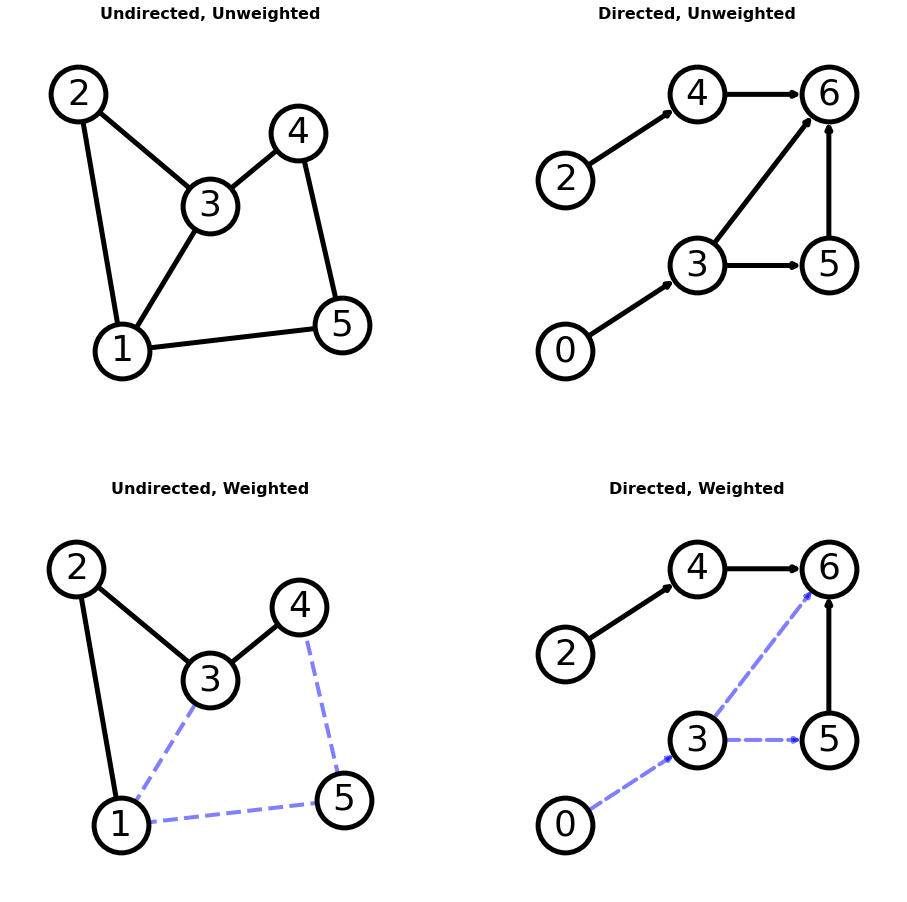

In [108]:
#@title
fig, axs = plt.subplots(2, 2, figsize=(16,16))

title_options = {
    'fontsize': 16, 
    'fontweight' : 'bold'
}

options = {
    "font_size": 36,
    "font_family": "sans-serif",
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}

# Undirected, Unweighted
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# Explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

nx.draw_networkx(G, pos, ax=axs[0,0], **options)

# Set margins for the axes so that nodes aren't clipped
axs[0,0].margins(0.20)
axs[0,0].set_title('Undirected, Unweighted', fontdict=title_options)
#axs[0,0].set_ylabel('Undirected', fontdict=title_options, rotation=0)
#axs[0,0].yaxis.set_label_coords(-0.2,0.5)
axs[0,0].set_axis_off()



# Directed, Unweighted
G = nx.DiGraph([(0, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# Group nodes by column
left_nodes = [0, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# Set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, ax=axs[0,1], **options)

# Set margins for the axes so that nodes aren't clipped
axs[0,1].margins(0.20)
axs[0,1].set_title('Directed, Unweighted', fontdict=title_options)
#axs[0,1].set_ylabel('Directed', fontdict=title_options, rotation=0)
#axs[0,1].yaxis.set_label_coords(-0.2,0.5)
axs[0,1].set_axis_off()



# Undirected, Weighted
G = nx.Graph()
G.add_edge(1, 2, weight=0.6)
G.add_edge(1, 3, weight=0.2)
G.add_edge(1, 5, weight=0.1)
G.add_edge(2, 3, weight=0.7)
G.add_edge(3, 4, weight=0.9)
G.add_edge(4, 5, weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

# Explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

# Nodes
nx.draw_networkx_nodes(G, pos, ax=axs[1,0], node_size=3000, 
                       node_color="white", edgecolors="black", linewidths=5)

# Edges
nx.draw_networkx_edges(G, pos, ax=axs[1,0], edgelist=elarge, width=5)
nx.draw_networkx_edges(G, pos, ax=axs[1,0], edgelist=esmall, width=4, 
                       alpha=0.5, edge_color="b", style="dashed")

# Labels
nx.draw_networkx_labels(G, pos, ax=axs[1,0], 
                        font_size=36, font_family="sans-serif")

# Set margins for the axes so that nodes aren't clipped
axs[1,0].margins(0.20)
axs[1,0].set_title('Undirected, Weighted', fontdict=title_options)
axs[1,0].set_axis_off()



# Directed, Weighted
G = nx.DiGraph(directed=True)
G.add_edges_from([(0, 3, {'weight': 0.2}), 
                  (2, 4, {'weight': 0.6}), 
                  (3, 5, {'weight': 0.1}), 
                  (3, 6, {'weight': 0.3}), 
                  (4, 6, {'weight': 0.7}), 
                  (5, 6, {'weight': 0.9})])

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

# Group nodes by column
left_nodes = [0, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# Set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

# Nodes
nx.draw_networkx_nodes(G, pos, ax=axs[1,1], node_size=3000, 
                       node_color="white", edgecolors="black", linewidths=5)

# Edges
nx.draw_networkx_edges(G, pos, ax=axs[1,1], edgelist=elarge, node_size=3000, width=5, arrows=True)
nx.draw_networkx_edges(G, pos, ax=axs[1,1], edgelist=esmall, node_size=3000, width=4, arrows=True, 
                       alpha=0.5, edge_color="b", style="dashed")

# Labels
nx.draw_networkx_labels(G, pos, ax=axs[1,1], 
                        font_size=36, font_family="sans-serif")

# Set margins for the axes so that nodes aren't clipped
axs[1,1].margins(0.20)
axs[1,1].set_title('Directed, Weighted', fontdict=title_options)
axs[1,1].set_axis_off();

# Some Families of Network Graphs
* Complete
* Ring
* Bipartite
* Tree
* Star

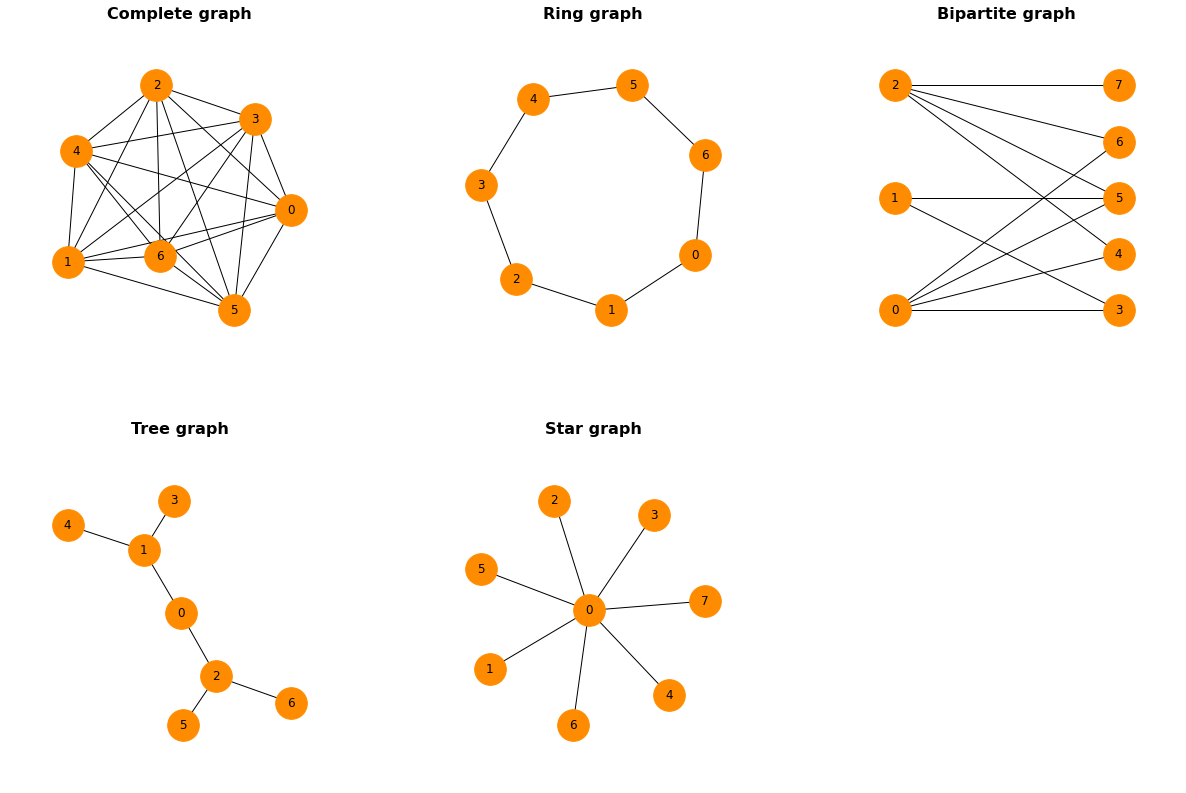

In [109]:
#@title
fig, axs = plt.subplots(2, 3, figsize=(21,14))

title_options = {
    'fontsize': 16, 
    'fontweight' : 'bold'
}

g_full = nx.complete_graph(7)
g_ring = nx.cycle_graph(7)
g_tree = nx.balanced_tree(2,2)
g_star = nx.star_graph(7)

g_bipartite = nx.bipartite.gnmk_random_graph(3, 5, 10, seed=123)
top = nx.bipartite.sets(g_bipartite)[0]
pos = nx.bipartite_layout(g_bipartite, top)

nx.draw_networkx(g_full, pos=nx.spring_layout(g_full), node_size=1000, node_color='darkorange', ax=axs[0,0])
# Set margins for the axes so that nodes aren't clipped
axs[0,0].margins(0.20)
axs[0,0].set_title('Complete graph', fontdict=title_options)
axs[0,0].set_axis_off();

nx.draw_networkx(g_ring, pos=nx.spring_layout(g_ring), node_size=1000, node_color='darkorange', ax=axs[0,1])
# Set margins for the axes so that nodes aren't clipped
axs[0,1].margins(0.20)
axs[0,1].set_title('Ring graph', fontdict=title_options)
axs[0,1].set_axis_off();

nx.draw_networkx(g_bipartite, pos=pos, node_size=1000, node_color='darkorange', ax=axs[0,2])
# Set margins for the axes so that nodes aren't clipped
axs[0,2].margins(0.20)
axs[0,2].set_title('Bipartite graph', fontdict=title_options)
axs[0,2].set_axis_off();

nx.draw_networkx(g_tree, pos=nx.spring_layout(g_tree), node_size=1000, node_color='darkorange', ax=axs[1,0])
# Set margins for the axes so that nodes aren't clipped
axs[1,0].margins(0.20)
axs[1,0].set_title('Tree graph', fontdict=title_options)
axs[1,0].set_axis_off();

nx.draw_networkx(g_star, pos=nx.spring_layout(g_star), node_size=1000, node_color='darkorange', ax=axs[1,1])
# Set margins for the axes so that nodes aren't clipped
axs[1,1].margins(0.20)
axs[1,1].set_title('Star graph', fontdict=title_options)
axs[1,1].set_axis_off();

axs[1,2].set_axis_off();

# Network Analysis

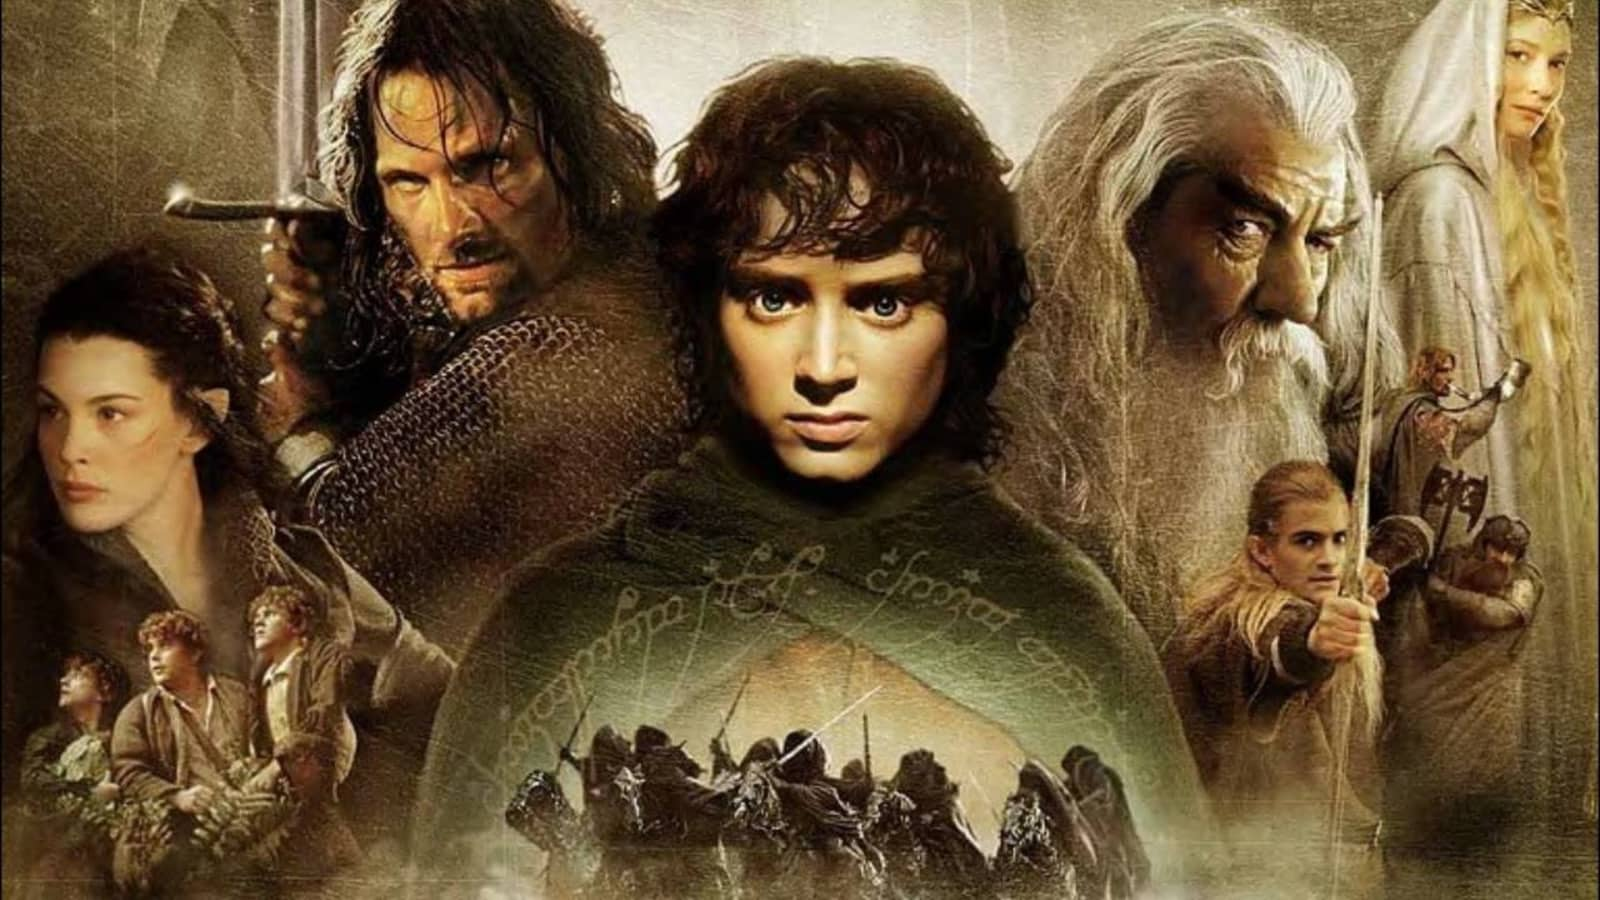

## Read Data

### Ontology

Read CSV data from the `morethanbooks` [Lord of the Rings Networks](https://github.com/morethanbooks/projects/tree/master/LotR) repository into a `pandas` DataFrame.  
`ontology.csv` contains the basic metadata about each entity (i.e. proper names used to reference characters, places, or groups) together with its identifier (e.g. the identifier for Aragorn is "arag").

In [110]:
ontology = pd.read_csv('https://raw.githubusercontent.com/morethanbooks/projects/master/LotR/ontologies/ontology.csv', sep='\t')
ontology.columns = ['id', 'type', 'label', 'freqsum', 'subtype', 'gender']
ontology.head()

,id,type,label,freqsum,subtype,gender
0,andu,pla,Anduin,109,pla,NaN
1,arag,per,Aragorn,1069,men,male
2,arat,per,Arathorn,36,men,male
3,arwe,per,Arwen,51,elves,female
4,bage,pla,Bag End,77,pla,NaN


### Books 1, 2, 3 Combined

Read CSV data from the `morethanbooks` [Lord of the Rings Networks](https://github.com/morethanbooks/projects/tree/master/LotR) repository into a `pandas` DataFrame.

`networks-id-3books.csv` contains an edges table with the number of times two entities are mentioned in the same paragraph across all three books of the series.

In this project, the nodes represent entities (i.e. proper names used to reference characters, places, or groups), and two of them are connected by an edge if in any paragraph there are references to these two entities.

Across the three books, Frodo and Sam are referenced in the same paragraph most frequently (533 paragraphs), and Frodo and Gandalf are referenced in the second most number of paragraphs(181 paragraphs).

In [111]:
books123 = pd.read_csv('https://raw.githubusercontent.com/morethanbooks/projects/master/LotR/tables/networks-id-3books.csv')
books123['Type'] = 'Books 123'
books123.columns = ['source', 'target', 'weight', 'volume']
books123.head()

,source,target,weight,volume
0,frod,sams,533,Books 123
1,frod,ganda,181,Books 123
2,merr,pipp,162,Books 123
3,arag,frod,146,Books 123
4,frod,goll,127,Books 123


### Book 1

Read CSV data from the `morethanbooks` [Lord of the Rings Networks](https://github.com/morethanbooks/projects/tree/master/LotR) repository into a `pandas` DataFrame.

`networks-id-volume1.csv` contains an edges table with the number of times two entities are mentioned in the same paragraph in [**The Fellowship of the Ring**](https://en.wikipedia.org/wiki/The_Lord_of_the_Rings), published on July 29, 1954.

In [112]:
book1 = pd.read_csv('https://raw.githubusercontent.com/morethanbooks/projects/master/LotR/tables/networks-id-volume1.csv')
book1['Type'] = 'Book 1'
book1.columns = ['source', 'target', 'weight', 'volume']

book1['title'] = 'The Fellowship of the Ring'
book1['publication_date'] = pd.to_datetime('1954-07-29')
book1.head()

,source,target,weight,volume,title,publication_date
0,frod,sams,171,Book 1,The Fellowship of the Ring,1954-07-29
1,frod,ganda,129,Book 1,The Fellowship of the Ring,1954-07-29
2,arag,frod,105,Book 1,The Fellowship of the Ring,1954-07-29
3,bilb,frod,96,Book 1,The Fellowship of the Ring,1954-07-29
4,frod,pipp,80,Book 1,The Fellowship of the Ring,1954-07-29


### Book 2

Read CSV data from the `morethanbooks` [Lord of the Rings Networks](https://github.com/morethanbooks/projects/tree/master/LotR) repository into a `pandas` DataFrame.

`networks-id-volume2.csv` contains an edges table with the number of times two entities are mentioned in the same paragraph in [**The Two Towers**](https://en.wikipedia.org/wiki/The_Lord_of_the_Rings), published on November 11, 1954.

In [113]:
book2 = pd.read_csv('https://raw.githubusercontent.com/morethanbooks/projects/master/LotR/tables/networks-id-volume2.csv')
book2['Type'] = 'Book 2'
book2.columns = ['source', 'target', 'weight', 'volume']

book2['title'] = 'The Two Towers'
book2['publication_date'] = pd.to_datetime('1954-11-11')
book2.head()

,source,target,weight,volume,title,publication_date
0,frod,sams,158,Book 2,The Two Towers,1954-11-11
1,goll,sams,101,Book 2,The Two Towers,1954-11-11
2,frod,goll,99,Book 2,The Two Towers,1954-11-11
3,merr,pipp,51,Book 2,The Two Towers,1954-11-11
4,gimli,lego,50,Book 2,The Two Towers,1954-11-11


### Book 3

Read CSV data from the `morethanbooks` [Lord of the Rings Networks](https://github.com/morethanbooks/projects/tree/master/LotR) repository into a `pandas` DataFrame.

`networks-id-volume3.csv` contains an edges table with the number of times two entities are mentioned in the same paragraph in [**The Return of the King**](https://en.wikipedia.org/wiki/The_Lord_of_the_Rings), published on October 20, 1955.

In [114]:
book3 = pd.read_csv('https://raw.githubusercontent.com/morethanbooks/projects/master/LotR/tables/networks-id-volume3.csv')
book3['Type'] = 'Book 3'
book3.columns = ['source', 'target', 'weight', 'volume']

book3['title'] = 'The Return of the King'
book3['publication_date'] = pd.to_datetime('1955-10-20')
book3.head()

,source,target,weight,volume,title,publication_date
0,frod,sams,193,Book 3,The Return of the King,1955-10-20
1,ganda,pipp,79,Book 3,The Return of the King,1955-10-20
2,merr,pipp,45,Book 3,The Return of the King,1955-10-20
3,arag,ganda,34,Book 3,The Return of the King,1955-10-20
4,dene,ganda,34,Book 3,The Return of the King,1955-10-20


## Create a DataFrame from the `books123` edgelist for an undirected graph

We can use `sqldf` to create a `pandas` DataFrame that combines the edges data from `books123` and the metadata about the entities from `ontology`.  The result is a DataFrame with all of the information we have about the paragraph references to pairs of entities across all three books.

We have undirected data, i.e. a particular person can appear as the source or the target and we're not interested in the distinction (direction), so we can make it easier to get the ego network (the network that is "visible" to a certain person) by duplicating each row with its inverse.  This way, we can group by a single column to get the ego network.

For simplicity in this early cell, and because this processing isn't actually needed for NetworkX, we don't perform this processing in this cell; however, we do perform it in the next cell to illustrate the difference between these methods.  

Note that in the DataFrame row filtering shown in this cell we have to search for `Frodo` both as a `source` or as a `target` to select all of the rows (edges) associated with Frodo's ego network.  In the next cell, we will see that conducting the processing in the SQL query will make it easier for us to identify character ego networks.

In [115]:
g_df = sqldf("""
    SELECT 
      sour.id AS source_id, sour.label as source_name, sour.type AS source_type, sour.subtype AS source_subtype, sour.gender AS source_gender,
      dest.id AS target_id, dest.label AS target_name, dest.type AS target_type, dest.subtype AS target_subtype, dest.gender AS target_gender,
      conn.weight, conn.volume
    FROM 
      books123 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id
""")

g_df.weight = g_df.weight.astype('int')

g_df.loc[((g_df.source_name.isin(['Frodo'])) | (g_df.target_name.isin(['Frodo']))) & (g_df.source_type == 'per') & (g_df.target_type == 'per'), :].sort_values(by=['source_id', 'weight'], ascending=[True, False])

,source_id,source_name,source_type,source_subtype,source_gender,target_id,target_name,target_type,target_subtype,target_gender,weight,volume
3,arag,Aragorn,per,men,male,frod,Frodo,per,hobbit,male,146,Books 123
876,arat,Arathorn,per,men,male,frod,Frodo,per,hobbit,male,2,Books 123
488,arwe,Arwen,per,elves,female,frod,Frodo,per,hobbit,male,6,Books 123
642,bali,Balin,per,dwarf,male,frod,Frodo,per,hobbit,male,4,Books 123
1124,bere,Beregond,per,men,male,frod,Frodo,per,hobbit,male,1,Books 123
5,bilb,Bilbo,per,hobbit,male,frod,Frodo,per,hobbit,male,126,Books 123
368,bill,Bill,per,animal,male,frod,Frodo,per,hobbit,male,9,Books 123
19,boro,Boromir,per,men,male,frod,Frodo,per,hobbit,male,68,Books 123
1160,cele,Celeborn,per,elves,male,frod,Frodo,per,hobbit,male,1,Books 123
443,dene,Denethor,per,men,male,frod,Frodo,per,hobbit,male,7,Books 123


In [116]:
# Number of references (edges) between Frodo and other people across the three books: 38
g_df.loc[((g_df.source_name.isin(['Frodo'])) | (g_df.target_name.isin(['Frodo']))) & (g_df.source_type == 'per') & (g_df.target_type == 'per'), :].sort_values(by=['source_id', 'weight'], ascending=[True, False]).shape

(38, 12)

## Create a DataFrame with bidirectional edgelists for an undirected graph

We have undirected data, so to make it easier to work with we're going to duplicate each row with its inverse.  This way, we can group by a single column to get the ego network (the network that is "visible" to a certain person).

In contrast to the previous cell, we perform this preprocessing step in the SQL query here to illustrate the difference between these methods.  

Note that in the DataFrame row filtering shown in this cell we have to search for `Frodo` only in the `source` column to select all of the rows (edges) associated with Frodo's ego network.

Again, this processing isn't actually needed for NetworkX, we're doing it for manual manipulation of the graph.

In [117]:
network_df = sqldf("""
    SELECT 
      sour.id AS source_id, sour.label as source_name, sour.type AS source_type, sour.subtype AS source_subtype, sour.gender AS source_gender,
      dest.id AS target_id, dest.label AS target_name, dest.type AS target_type, dest.subtype AS target_subtype, dest.gender AS target_gender,
      conn.weight, conn.volume
    FROM 
      books123 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

    UNION 

    SELECT 
      dest.id AS source_id, dest.label as source_name, dest.type AS source_type, dest.subtype AS source_subtype, dest.gender AS source_gender,
      sour.id AS target_id, sour.label AS target_name, sour.type AS target_type, sour.subtype AS target_subtype, sour.gender AS target_gender,
      conn.weight, conn.volume
    FROM 
      books123 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

  """)

network_df.weight = network_df.weight.astype('int')


network_df.loc[(network_df.source_name.isin(['Frodo'])) & (network_df.source_type == 'per') & (network_df.target_type == 'per'), :].sort_values(by=['source_id', 'weight'], ascending=[True, False])

,source_id,source_name,source_type,source_subtype,source_gender,target_id,target_name,target_type,target_subtype,target_gender,weight,volume
1030,frod,Frodo,per,hobbit,male,sams,Sam,per,hobbit,male,533,Books 123
997,frod,Frodo,per,hobbit,male,ganda,Gandalf,per,ainur,male,181,Books 123
974,frod,Frodo,per,hobbit,male,arag,Aragorn,per,men,male,146,Books 123
1003,frod,Frodo,per,hobbit,male,goll,Gollum,per,hobbit,male,127,Books 123
980,frod,Frodo,per,hobbit,male,bilb,Bilbo,per,hobbit,male,126,Books 123
1026,frod,Frodo,per,hobbit,male,pipp,Pippin,per,hobbit,male,115,Books 123
1017,frod,Frodo,per,hobbit,male,merr,Merry,per,hobbit,male,86,Books 123
982,frod,Frodo,per,hobbit,male,boro,Boromir,per,men,male,68,Books 123
995,frod,Frodo,per,hobbit,male,fara,Faramir,per,men,male,55,Books 123
991,frod,Frodo,per,hobbit,male,elro,Elrond,per,elves,male,39,Books 123


In [118]:
# Number of references (edges) between Frodo and other people across the three books: 38
network_df.loc[(network_df.source_name.isin(['Frodo'])) & (network_df.source_type == 'per') & (network_df.target_type == 'per'), :].sort_values(by=['source_id', 'weight'], ascending=[True, False]).shape

(38, 12)

Filter for pairs of entities that were mentioned in the same paragraph at least twice and then sort by weight and source_id


In [119]:
# Filter for edges with weights >= 2
network_df.loc[network_df.weight >= 2, :].sort_values(['weight', 'source_id'], ascending=[True, True]).head(10)

,source_id,source_name,source_type,source_subtype,source_gender,target_id,target_name,target_type,target_subtype,target_gender,weight,volume
10,andu,Anduin,pla,pla,None,dwar,Dwarves,gro,dwarf,None,2,Books 123
12,andu,Anduin,pla,pla,None,elro,Elrond,per,elves,male,2,Books 123
16,andu,Anduin,pla,pla,None,fara,Faramir,per,men,male,2,Books 123
21,andu,Anduin,pla,pla,None,goll,Gollum,per,hobbit,male,2,Books 123
37,andu,Anduin,pla,pla,None,orth,Orthanc,pla,pla,None,2,Books 123
101,arag,Aragorn,per,men,male,osgi,Osgiliath,pla,pla,None,2,Books 123
118,arat,Arathorn,per,men,male,arwe,Arwen,per,elves,female,2,Books 123
128,arat,Arathorn,per,men,male,frod,Frodo,per,hobbit,male,2,Books 123
130,arat,Arathorn,per,men,male,gimli,Gimli,per,dwarf,male,2,Books 123
139,arat,Arathorn,per,men,male,mord,Mordor,pla,pla,None,2,Books 123


## Check that the same number of source and target nodes were created

In [120]:
network_df.source_id.nunique(), network_df.target_id.nunique()

(73, 73)

## Count the number of nodes that are: group, person, place, thing

Here, we are interested in the people, so when we create our network graph we will only include the `per` nodes and edges, i.e. the ones associated with people.

In [121]:
network_df.groupby(['source_type'])['source_id'].count()

source_type
gro      317
per     1614
pla      896
thin      61
Name: source_id, dtype: int64

# Create a network graph of people with edge weights greater than 20

[NetworkX](https://networkx.org/documentation/stable/index.html) has many functions for [reading and writing graphs](https://networkx.org/documentation/stable/reference/readwrite/index.html) and [converting to and from other data formats](https://networkx.org/documentation/stable/reference/convert.html).  We can create a network graph `G` from a `pandas` DataFrame using NetworkX's [`from_pandas_edgelist`](https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html) function.  

A graph `G = (V, E)` is mathematical structure with a set `V` of elements, called vertices or nodes, and a set `E` of pairs of nodes, called edges or links.  A network can be `undirected` or `directed`.  In addition, a network can be `unweighted` or `weighted`.

To convert the edgelist data in the DataFrame into a graph `G` using `from_pandas_edgelist`, the DataFrame must contain an edge list representation of a graph, i.e. at least two columns of node names and zero or more columns of edge attributes.  Each row will be processed as one edge instance.

`source` is a valid column name (string or integer) for the source nodes (for the directed case).

`target` is a valid column name (string or integer) for the target nodes (for the directed case).

`edge_attr` is a valid column name (str or int) or iterable of column names that are used to retrieve items and add them to the graph as edge attributes. If True, all of the remaining columns will be added. If None, no edge attributes are added to the graph.

`create_using` is the graph type to create.  The default graph, [`nx.Graph()`](https://networkx.org/documentation/stable/reference/classes/graph.html), creates an undirected graph of nodes and edges with optional data, or attributes.

Given our interest in characters, we restrict the graph to references about people.  In addition, we further restrict our attention to pairs of people who are referenced together more than 20 times across all the books to reduce the number of edges such that, for readability, the edge count is not more than four times the node count [[Melancon 06](https://hal-lirmm.ccsd.cnrs.fr/lirmm-00091354/document)].

In [122]:
#G = nx.from_pandas_edgelist(
#        g_df[(g_df['source_type'] == 'per') & (g_df['target_type'] == 'per') & (g_df['weight'] > 20)],
#        source="source_name",
#        target="target_name",
#        edge_attr=["weight"],
#        create_using=nx.Graph(),
#    )

people_of_interest_df = network_df[(network_df['source_type'] == 'per') & (network_df['target_type'] == 'per') & (network_df['weight'] > 20)]

G = nx.from_pandas_edgelist(
        people_of_interest_df,
        source="source_name",
        target="target_name",
        edge_attr=["weight"],
        create_using=nx.Graph(),
    )

G

# Plot the nodes of the LotR network

In [154]:
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

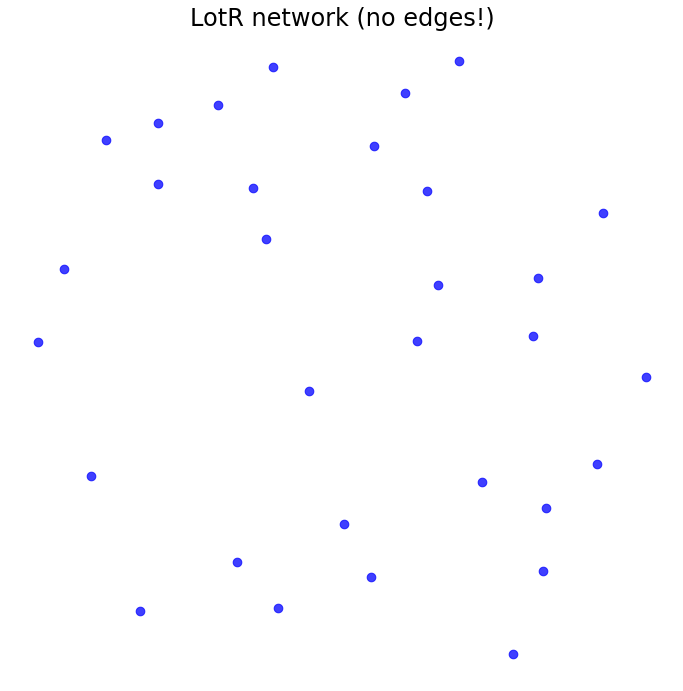

In [178]:
plt.figure(figsize=(12,12))

pos = nx.layout.random_layout(G, seed=10) # nx.layout.spring_layout(G, k=0.1, weight='weight', seed=24)

nodes = nx.draw_networkx_nodes(G, pos, node_size=75, node_color="Blue", alpha=0.75)

# labels = nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', verticalalignment='bottom', )

ax = plt.gca()
ax.set_axis_off()

plt.title('LotR network (no edges!)', size=24)
plt.show()

# Plot the nodes and edges of the LotR network

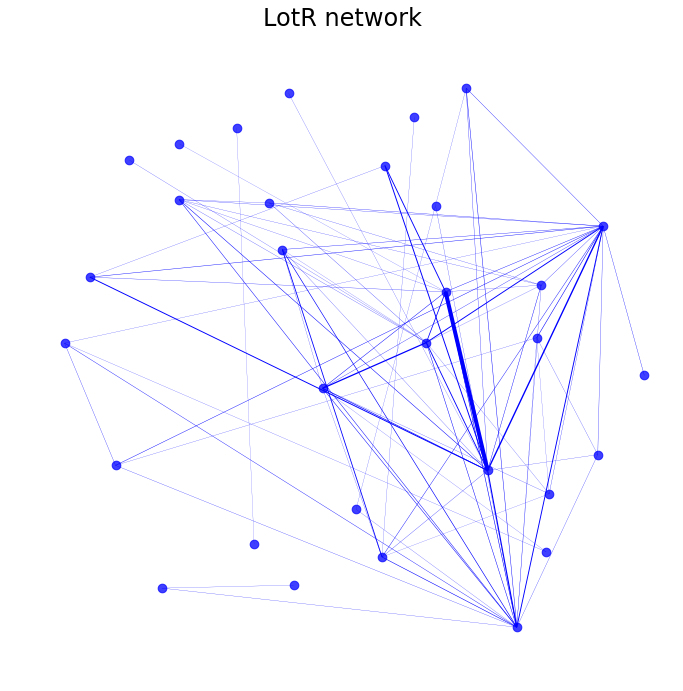

In [179]:
plt.figure(figsize=(12,12))

# Let's keep the same position structure as previously

nodes = nx.draw_networkx_nodes(G, pos, node_size=75, node_color='Blue', alpha=0.75)

unique_weights = network_df['weight'].unique()
for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    width = weight*4.0/max(unique_weights)
    nx.draw_networkx_edges(G, pos, edgelist=weighted_edges, width=width, alpha=1, edge_color='Blue')

# labels = nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', verticalalignment='bottom', clip_on=False)

ax = plt.gca()
ax.set_axis_off()

plt.title('LotR network', size=24)
plt.show()

## Number of nodes

Sometimes the number of vertices (also called nodes) in a graph is called the `order` of the graph.  We can get the number of nodes in a graph with `G.order()` and `G.number_of_nodes()`.

In [123]:
# Count the number of nodes
G.order()

31

In [124]:
# Count the number of nodes
G.number_of_nodes()

31

## List of nodes

In [125]:
# List all of the nodes

# [node for node in G.nodes]

G.nodes()

NodeView(('Aragorn', 'Arathorn', 'Arwen', 'Boromir', 'Elendil', 'Elrond', 'Éomer', 'Faramir', 'Frodo', 'Gandalf', 'Gimli', 'Legolas', 'Merry', 'Pippin', 'Sam', 'Saruman', 'Sauron', 'Théoden', 'Beregond', 'Bilbo', 'Gollum', 'Bill', 'Denethor', 'Celeborn', 'Galadriel', 'Isildur', 'Éowyn', 'Bombadil', 'Shadowfax', 'Treebeard', 'Glóin'))

## List neighbors of a node

In [126]:
# List neighbors of node 'Aragorn'
list(G.neighbors('Aragorn'))

['Arathorn',
 'Arwen',
 'Boromir',
 'Elendil',
 'Elrond',
 'Éomer',
 'Faramir',
 'Frodo',
 'Gandalf',
 'Gimli',
 'Legolas',
 'Merry',
 'Pippin',
 'Sam',
 'Saruman',
 'Sauron',
 'Théoden']

## Determine the degree of each node in the graph

In [127]:
# Arrange nodes in descending order of degree
sorted([(node, G.degree(node)) for node in G.nodes], key=lambda item: -item[1])

[('Gandalf', 18),
 ('Aragorn', 17),
 ('Frodo', 14),
 ('Pippin', 11),
 ('Sam', 10),
 ('Merry', 9),
 ('Boromir', 7),
 ('Faramir', 7),
 ('Gimli', 7),
 ('Legolas', 6),
 ('Saruman', 5),
 ('Treebeard', 5),
 ('Elrond', 4),
 ('Éomer', 4),
 ('Sauron', 4),
 ('Théoden', 4),
 ('Bilbo', 4),
 ('Denethor', 4),
 ('Gollum', 3),
 ('Arwen', 2),
 ('Elendil', 2),
 ('Éowyn', 2),
 ('Arathorn', 1),
 ('Beregond', 1),
 ('Bill', 1),
 ('Celeborn', 1),
 ('Galadriel', 1),
 ('Isildur', 1),
 ('Bombadil', 1),
 ('Shadowfax', 1),
 ('Glóin', 1)]

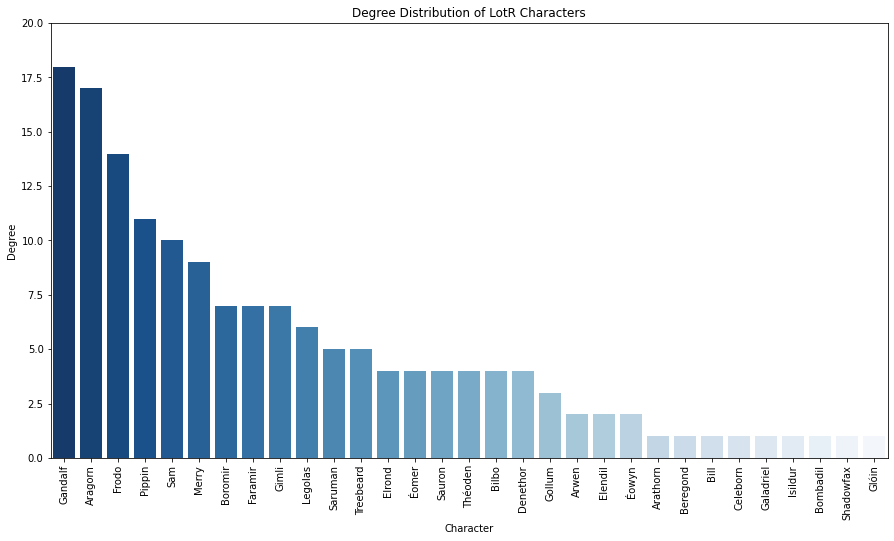

In [128]:
G_degree_distribution = pd.DataFrame(sorted([(node, G.degree(node)) for node in G.nodes], key=lambda item: -item[1]), columns=['Character', 'Degree'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Degree', data=G_degree_distribution, palette='Blues_r') # palette='tab20'
plt.ylim(0, 20)
plt.xticks(rotation = 90)
plt.title('Degree Distribution of LotR Characters');

## Determine the average degree of the graph

The average degree of a network is

\begin{align}
\langle k \rangle = \frac{\sum_{i=1} k_i}{N}
\end{align}

In [129]:
round(np.mean([G.degree(node) for node in G.nodes]), 2)

5.1

In [130]:
# The average degree of an undirected network equals 2L / N
round( 2 * len(G.edges) / len(G.nodes) , 2)

5.1

## Number of edges

Sometimes the number of edges (also called links) in a graph is called the `size` of the graph.  We can get the number of edges in a graph with `G.size()` and `G.number_of_edges()`.

In [131]:
# Count the number of edges
G.size()

79

In [132]:
# Count the number of edges
G.number_of_edges()

79

## List of edges

In [133]:
# List all of the edges

# [edge for edge in G.edges]

G.edges()

EdgeView([('Aragorn', 'Arathorn'), ('Aragorn', 'Arwen'), ('Aragorn', 'Boromir'), ('Aragorn', 'Elendil'), ('Aragorn', 'Elrond'), ('Aragorn', 'Éomer'), ('Aragorn', 'Faramir'), ('Aragorn', 'Frodo'), ('Aragorn', 'Gandalf'), ('Aragorn', 'Gimli'), ('Aragorn', 'Legolas'), ('Aragorn', 'Merry'), ('Aragorn', 'Pippin'), ('Aragorn', 'Sam'), ('Aragorn', 'Saruman'), ('Aragorn', 'Sauron'), ('Aragorn', 'Théoden'), ('Arwen', 'Elrond'), ('Boromir', 'Denethor'), ('Boromir', 'Faramir'), ('Boromir', 'Frodo'), ('Boromir', 'Gandalf'), ('Boromir', 'Pippin'), ('Boromir', 'Sam'), ('Elendil', 'Isildur'), ('Elrond', 'Frodo'), ('Elrond', 'Gandalf'), ('Éomer', 'Éowyn'), ('Éomer', 'Gandalf'), ('Éomer', 'Théoden'), ('Faramir', 'Denethor'), ('Faramir', 'Frodo'), ('Faramir', 'Gandalf'), ('Faramir', 'Pippin'), ('Faramir', 'Sam'), ('Frodo', 'Bilbo'), ('Frodo', 'Gandalf'), ('Frodo', 'Gimli'), ('Frodo', 'Gollum'), ('Frodo', 'Legolas'), ('Frodo', 'Merry'), ('Frodo', 'Pippin'), ('Frodo', 'Sam'), ('Frodo', 'Sauron'), ('Frodo'

## Determine the density of the graph

The density of a network is the fraction of possible links that actually exist, which is the same as the fraction of pairs of nodes that are actually connected.  The average degree of a network is related (directly proportional) to its density.  The density is the ratio between the average and maximum degree.  

The higher the density, the more likely it is that the network is *connected* (i.e. that you can reach any node from any other node by following a path along links and intermediate nodes).

The density of a network with *N* nodes and *L* links is

\begin{align}
d = \frac{L}{L_{max}}
\end{align}

In an *undirected* network this equals

\begin{align}
d = \frac{L}{L_{max}} = \frac{2L}{N(N-1)}
\end{align}

In a *directed* network this equals 

\begin{align}
d = \frac{L}{L_{max}} = \frac{L}{N(N-1)}
\end{align}


In [134]:
round(nx.density(G), 2)

0.17

In [135]:
# The density of an undirected network equals 2L / ( N * (N-1) )
# Alternatively: 2 * len(G.edges) / len(G.nodes) / (len(G.nodes)-1)
round( 2 * len(G.edges) / ( len(G.nodes) * (len(G.nodes)-1) ) , 2 )  

0.17

## Determine the *length* of the shortest path between two specific nodes

In [136]:
nx.shortest_path_length(G, source='Frodo', target='Arwen')

2

## Specify the *shortest path* between two specific nodes

In [137]:
nx.shortest_path(G, source='Frodo', target='Arwen', weight='weight')

['Frodo', 'Elrond', 'Arwen']

## Determine whether the network is connected

A node `j` is *reachable* from another node `i` if there is a walk from from `i` to `j`.  A graph `G` is *connected* if every node is reachable from every other.

In [138]:
nx.is_connected(G)

False

## Determine the number and size of the connected components

A *connected component* of a graph `G` is a maximally *connected* (i.e. that you can reach any node from any other node by following a path along links and intermediate nodes) subgraph of `G`.

In [139]:
# Count the number of connected components
nx.algorithms.number_connected_components(G)

2

In [140]:
# Determine the number of nodes in each of the connected components
[len(component) for component in sorted(nx.connected_components(G))]

[29, 2]

## Determine the average shortest path length of connected components in the graph

A common measure of the distance between nodes in a network is the minimum number of edges needed to traverse from one node to the other.  This minimum path is called the *shortest path*, and its length is called the *shortest path length*.

We can then define the average shortest path length for the entire network by averaging the shortest path lengths across all pairs of nodes.

In [141]:
[round(nx.average_shortest_path_length(C), 2) for C in (G.subgraph(c).copy() for c in nx.connected_components(G))]

[2.13, 1.0]

## Determine the diameter of the connected components in the graph

The *diameter* of a network is the maximum shortest path length across all pairs of nodes.  That is, the length of the longest shortest path in the network.

In [142]:
[nx.diameter(C) for C in (G.subgraph(c).copy() for c in nx.connected_components(G))]

[4, 1]

## Determine the average clustering coefficient of the graph

The local clustering of each node in a graph G is the fraction of triangles that actually exist over all possible triangles in its neighborhood.  The average clustering coefficient of a graph G is the mean of local clusterings.

In [143]:
# Global average clustering
round(nx.average_clustering(G), 3)

0.44

In [144]:
# Global transitivity (weights nodes with large degree higher than average clustering)
round(nx.transitivity(G), 3)

0.453

## Determine the assortativity of the network based on the *correlation* between degrees of neighbor nodes, as well as a categorical attribute

Nodes (People) in a social network may have a variety of attributes, e.g. age, gender, location, interests, etc.  For example, in our LotR network, we have the attributes `gender` and `subtype` for each person.

In social networks, it's often the case that people who are connected to one another tend to share similar attributes.  For example, in our LotR network, it may be the case that people who are connected to one another tend to be of the same gender or subtype.  This property is called *assortativity*.

*Assortativity* based on `degree` is called degree assortativity, which occurs when high-degree nodes tend to be connected to other high-degree nodes and low-degree nodes tend to be connected to other low-degree nodes.  In addition to `degree`, assortativity can also be based on *categorical* or *numeric* attributes.

In [145]:
# Assortativity of the connected component based on the correlation between degrees of neighbor nodes
round(nx.degree_assortativity_coefficient(G), 2)

-0.26

# Add gender and subtype attributes and colors to the nodes

Determine the unique genders in the dataset

In [146]:
genders = sorted(list(network_df.loc[network_df.source_type == 'per', 'source_gender'].unique()))
genders

['female', 'male']

Associate the unique genders with colors

In [147]:
gender_colormap = { 'female': 'darkorange', 'male': 'blue' }
gender_colormap

{'female': 'darkorange', 'male': 'blue'}

Determine the unique subtypes in the dataset

In [148]:
subtypes = sorted(list(network_df.loc[network_df.source_type == 'per', 'source_subtype'].unique()))
subtypes

['ainur', 'animal', 'dwarf', 'elves', 'ents', 'hobbit', 'men', 'orcs']

Associate the unique subtypes with colors

In [149]:
subtype_colormap = { 'ainur': 'tab:blue', 'animal': 'tab:orange', 'dwarf': 'tab:green', 'elves': 'tab:red', 'ents': 'tab:purple', 'hobbit': 'tab:brown', 'men': 'tab:pink', 'orcs': 'tab:cyan' }
subtype_colormap

{'ainur': 'tab:blue',
 'animal': 'tab:orange',
 'dwarf': 'tab:green',
 'elves': 'tab:red',
 'ents': 'tab:purple',
 'hobbit': 'tab:brown',
 'men': 'tab:pink',
 'orcs': 'tab:cyan'}

Create a dictionary that associates each node (person) with four new attributes for that person

In [150]:
attrs = {}
for row in network_df.loc[network_df.source_type == 'per', :].itertuples(index=False):
    if row.source_name not in attrs:
        attrs[row.source_name] = {'subtype': row.source_subtype, 
                                  'subtype_color': subtype_colormap[row.source_subtype], 
                                  'gender': row.source_gender, 
                                  'gender_color': gender_colormap[row.source_gender] }

len(attrs)

43

Assign the attributes to the nodes in the network

In [151]:
nx.set_node_attributes(G, attrs)

## Check that the attributes were added to the nodes

In [152]:
# G.nodes.data()
[(n, G.nodes[n]) for n in G.nodes()]

[('Aragorn',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'men',
   'subtype_color': 'tab:pink'}),
 ('Arathorn',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'men',
   'subtype_color': 'tab:pink'}),
 ('Arwen',
  {'gender': 'female',
   'gender_color': 'darkorange',
   'subtype': 'elves',
   'subtype_color': 'tab:red'}),
 ('Boromir',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'men',
   'subtype_color': 'tab:pink'}),
 ('Elendil',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'men',
   'subtype_color': 'tab:pink'}),
 ('Elrond',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'elves',
   'subtype_color': 'tab:red'}),
 ('Éomer',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'men',
   'subtype_color': 'tab:pink'}),
 ('Faramir',
  {'gender': 'male',
   'gender_color': 'blue',
   'subtype': 'men',
   'subtype_color': 'tab:pink'}),
 ('Frodo',
  {'gender': 'male',
   'gender_color': 'blue',
   'sub

## Check that the undirected edges have weights

In [153]:
# G.edges.data()
[(u, v, d) for (u, v, d) in G.edges(data=True)]

[('Aragorn', 'Arathorn', {'weight': 29}),
 ('Aragorn', 'Arwen', {'weight': 26}),
 ('Aragorn', 'Boromir', {'weight': 63}),
 ('Aragorn', 'Elendil', {'weight': 28}),
 ('Aragorn', 'Elrond', {'weight': 59}),
 ('Aragorn', 'Éomer', {'weight': 50}),
 ('Aragorn', 'Faramir', {'weight': 31}),
 ('Aragorn', 'Frodo', {'weight': 146}),
 ('Aragorn', 'Gandalf', {'weight': 123}),
 ('Aragorn', 'Gimli', {'weight': 73}),
 ('Aragorn', 'Legolas', {'weight': 84}),
 ('Aragorn', 'Merry', {'weight': 65}),
 ('Aragorn', 'Pippin', {'weight': 64}),
 ('Aragorn', 'Sam', {'weight': 75}),
 ('Aragorn', 'Saruman', {'weight': 24}),
 ('Aragorn', 'Sauron', {'weight': 32}),
 ('Aragorn', 'Théoden', {'weight': 32}),
 ('Arwen', 'Elrond', {'weight': 23}),
 ('Boromir', 'Denethor', {'weight': 27}),
 ('Boromir', 'Faramir', {'weight': 27}),
 ('Boromir', 'Frodo', {'weight': 68}),
 ('Boromir', 'Gandalf', {'weight': 33}),
 ('Boromir', 'Pippin', {'weight': 30}),
 ('Boromir', 'Sam', {'weight': 26}),
 ('Elendil', 'Isildur', {'weight': 25})

# Create a new network graph that only consists of the largest connected component

## Determine the largest connected component

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

29

## Create a new network graph that only consists of the largest connected component

In [ ]:
conn_comp = G.subgraph(largest_cc).copy()
conn_comp

## Confirm that the new network graph (conn_comp) is indeed connected

In [ ]:
nx.is_connected(conn_comp)

True

# Analyze characteristics of the largest connected component of the LotR network

## Number of nodes

Sometimes the number of vertices (also called nodes) in a graph is called the `order` of the graph.  We can get the number of nodes in a graph with `G.order()` and `G.number_of_nodes()`.

In [ ]:
# Count the number of nodes
conn_comp.order()

29

In [ ]:
# Count the number of nodes
conn_comp.number_of_nodes()

29

## List of nodes

In [ ]:
# List all of the nodes

# [node for node in conn_comp.nodes]

conn_comp.nodes()

NodeView(('Aragorn', 'Arathorn', 'Arwen', 'Boromir', 'Elendil', 'Elrond', 'Éomer', 'Faramir', 'Frodo', 'Gandalf', 'Gimli', 'Legolas', 'Merry', 'Pippin', 'Sam', 'Saruman', 'Sauron', 'Théoden', 'Beregond', 'Bilbo', 'Gollum', 'Bill', 'Denethor', 'Isildur', 'Éowyn', 'Bombadil', 'Shadowfax', 'Treebeard', 'Glóin'))

## List neighbors of a node

In [ ]:
# List neighbors of node 'Aragorn'
list(conn_comp.neighbors('Aragorn'))

['Arathorn',
 'Arwen',
 'Boromir',
 'Elendil',
 'Elrond',
 'Éomer',
 'Faramir',
 'Frodo',
 'Gandalf',
 'Gimli',
 'Legolas',
 'Merry',
 'Pippin',
 'Sam',
 'Saruman',
 'Sauron',
 'Théoden']

## Determine the degree of each node in the graph

In [ ]:
# Arrange nodes in descending order of degree
sorted([(node, conn_comp.degree(node)) for node in conn_comp.nodes], key=lambda item: -item[1])

[('Gandalf', 18),
 ('Aragorn', 17),
 ('Frodo', 14),
 ('Pippin', 11),
 ('Sam', 10),
 ('Merry', 9),
 ('Boromir', 7),
 ('Faramir', 7),
 ('Gimli', 7),
 ('Legolas', 6),
 ('Saruman', 5),
 ('Treebeard', 5),
 ('Elrond', 4),
 ('Éomer', 4),
 ('Sauron', 4),
 ('Théoden', 4),
 ('Bilbo', 4),
 ('Denethor', 4),
 ('Gollum', 3),
 ('Arwen', 2),
 ('Elendil', 2),
 ('Éowyn', 2),
 ('Arathorn', 1),
 ('Beregond', 1),
 ('Bill', 1),
 ('Isildur', 1),
 ('Bombadil', 1),
 ('Shadowfax', 1),
 ('Glóin', 1)]

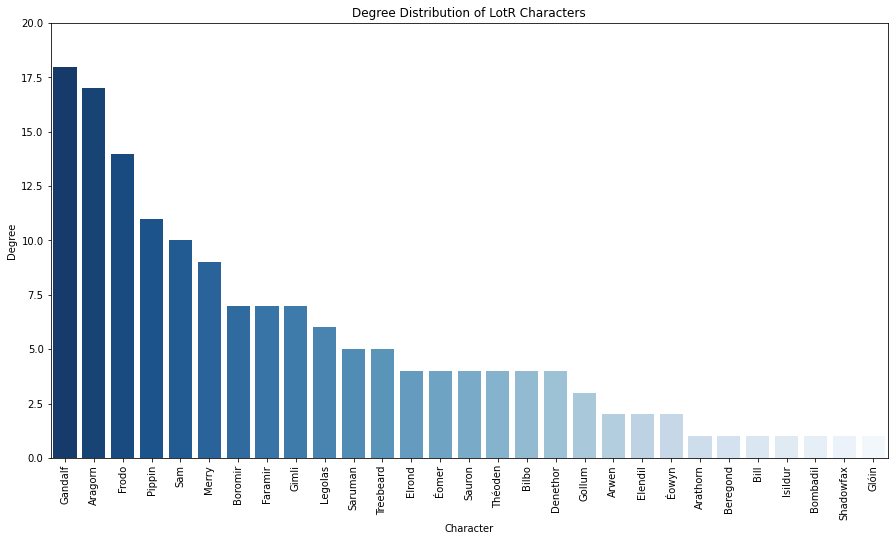

In [ ]:
cc_degree_distribution = pd.DataFrame(sorted([(node, conn_comp.degree(node)) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'Degree'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Degree', data=cc_degree_distribution, palette='Blues_r') # palette='tab20'
plt.ylim(0, 20)
plt.xticks(rotation = 90)
plt.title('Degree Distribution of LotR Characters');

## Determine the average degree of the graph

The average degree of a network is

\begin{align}
\langle k \rangle = \frac{\sum_{i=1} k_i}{N}
\end{align}

In [ ]:
round(np.mean([conn_comp.degree(node) for node in conn_comp.nodes]), 2)

5.38

In [ ]:
# The average degree of an undirected network equals 2L / N
round( 2 * len(conn_comp.edges) / len(conn_comp.nodes) , 2)

5.38

## Number of edges

Sometimes the number of edges (also called links) in a graph is called the `size` of the graph.  We can get the number of edges in a graph with `G.size()` and `G.number_of_edges()`.

In [ ]:
# Count the number of edges
conn_comp.size()

78

In [ ]:
# Count the number of edges
conn_comp.number_of_edges()

78

## List of edges

In [ ]:
# List all of the edges

# [edge for edge in conn_comp.edges]

conn_comp.edges()

EdgeView([('Aragorn', 'Arathorn'), ('Aragorn', 'Arwen'), ('Aragorn', 'Boromir'), ('Aragorn', 'Elendil'), ('Aragorn', 'Elrond'), ('Aragorn', 'Éomer'), ('Aragorn', 'Faramir'), ('Aragorn', 'Frodo'), ('Aragorn', 'Gandalf'), ('Aragorn', 'Gimli'), ('Aragorn', 'Legolas'), ('Aragorn', 'Merry'), ('Aragorn', 'Pippin'), ('Aragorn', 'Sam'), ('Aragorn', 'Saruman'), ('Aragorn', 'Sauron'), ('Aragorn', 'Théoden'), ('Arwen', 'Elrond'), ('Boromir', 'Denethor'), ('Boromir', 'Faramir'), ('Boromir', 'Frodo'), ('Boromir', 'Gandalf'), ('Boromir', 'Pippin'), ('Boromir', 'Sam'), ('Elendil', 'Isildur'), ('Elrond', 'Frodo'), ('Elrond', 'Gandalf'), ('Éomer', 'Éowyn'), ('Éomer', 'Gandalf'), ('Éomer', 'Théoden'), ('Faramir', 'Denethor'), ('Faramir', 'Frodo'), ('Faramir', 'Gandalf'), ('Faramir', 'Pippin'), ('Faramir', 'Sam'), ('Frodo', 'Bilbo'), ('Frodo', 'Gandalf'), ('Frodo', 'Gimli'), ('Frodo', 'Gollum'), ('Frodo', 'Legolas'), ('Frodo', 'Merry'), ('Frodo', 'Pippin'), ('Frodo', 'Sam'), ('Frodo', 'Sauron'), ('Frodo'

## Determine the density of the largest connected component

The density of a network is the fraction of possible links that actually exist, which is the same as the fraction of pairs of nodes that are actually connected.  The average degree of a network is related (directly proportional) to its density.  The density is the ratio between the average and maximum degree.  

The higher the density, the more likely it is that the network is *connected* (i.e. that you can reach any node from any other node by following a path along links and intermediate nodes).

The density of a network with *N* nodes and *L* links is

\begin{align}
d = \frac{L}{L_{max}}
\end{align}

In an *undirected* network this equals

\begin{align}
d = \frac{L}{L_{max}} = \frac{2L}{N(N-1)}
\end{align}

In a *directed* network this equals 

\begin{align}
d = \frac{L}{L_{max}} = \frac{L}{N(N-1)}
\end{align}

In [ ]:
round(nx.density(conn_comp), 2)

0.19

In [ ]:
# The density of an undirected network equals 2L / ( N * (N-1) )
# Alternatively: 2 * len(conn_comp.edges) / len(conn_comp.nodes) / (len(conn_comp.nodes)-1)
round( 2 * len(conn_comp.edges) / ( len(conn_comp.nodes) * (len(conn_comp.nodes)-1) ) , 2 )  

0.19

## Determine the *length* of the shortest path between two specific nodes

In [ ]:
nx.shortest_path_length(conn_comp, source='Frodo', target='Arwen')

2

## Specify the *shortest path* between two specific nodes

In [ ]:
nx.shortest_path(conn_comp, source='Frodo', target='Arwen', weight='weight')

['Frodo', 'Elrond', 'Arwen']

## Determine whether the network is connected

A node `j` is *reachable* from another node `i` if there is a walk from from `i` to `j`.  A graph `G` is *connected* if every node is reachable from every other.

In [ ]:
nx.is_connected(conn_comp)

True

## Determine the number and size of the connected components

A *connected component* of a graph `G` is a maximally *connected* (i.e. that you can reach any node from any other node by following a path along links and intermediate nodes) subgraph of `G`.

In [ ]:
# Count the number of connected components
nx.algorithms.number_connected_components(conn_comp)

1

## Determine the average shortest path length of the largest connected component

A common measure of the distance between nodes in a network is the minimum number of edges needed to traverse from one node to the other.  This minimum path is called the *shortest path*, and its length is called the *shortest path length*.

We can then define the average shortest path length for the entire network by averaging the shortest path lengths across all pairs of nodes.

In [ ]:
round(nx.average_shortest_path_length(conn_comp), 2)

2.13

## Determine the diameter of the largest connected component

The *diameter* of a network is the maximum shortest path length across all pairs of nodes.  That is, the length of the longest shortest path in the network.



In [ ]:
nx.algorithms.distance_measures.diameter(conn_comp)

4

## Determine the eccentricity of the nodes in the largest connected component
The *eccentricity* of a node v is the maximum distance from v to all other nodes in G.

In [ ]:
nx.algorithms.distance_measures.eccentricity(conn_comp)

{'Aragorn': 2,
 'Arathorn': 3,
 'Arwen': 3,
 'Beregond': 4,
 'Bilbo': 4,
 'Bill': 4,
 'Bombadil': 4,
 'Boromir': 3,
 'Denethor': 4,
 'Elendil': 3,
 'Elrond': 3,
 'Faramir': 3,
 'Frodo': 3,
 'Gandalf': 3,
 'Gimli': 3,
 'Glóin': 4,
 'Gollum': 4,
 'Isildur': 4,
 'Legolas': 3,
 'Merry': 3,
 'Pippin': 3,
 'Sam': 3,
 'Saruman': 3,
 'Sauron': 3,
 'Shadowfax': 4,
 'Théoden': 3,
 'Treebeard': 4,
 'Éomer': 3,
 'Éowyn': 4}

## Determine the radius of the largest connected component
The *radius* is the minimum eccentricity.

In [ ]:
nx.algorithms.distance_measures.radius(conn_comp)

2

## Determine the nodes in the center of the largest connected component
The *center* is the set of nodes with eccentricity equal to radius.

In [ ]:
nx.algorithms.distance_measures.center(conn_comp)

['Aragorn']

## Determine the nodes in the periphery of the largest connected component
The *periphery* is the set of nodes with eccentricity equal to the diameter.

In [ ]:
nx.algorithms.distance_measures.periphery(conn_comp)

['Beregond',
 'Bilbo',
 'Gollum',
 'Bill',
 'Denethor',
 'Isildur',
 'Éowyn',
 'Bombadil',
 'Shadowfax',
 'Treebeard',
 'Glóin']

## Determine the average clustering coefficient of the largest connected coefficient

The local clustering of each node in a graph G is the fraction of triangles that actually exist over all possible triangles in its neighborhood.  The average clustering coefficient of a graph G is the mean of local clusterings.

In [ ]:
# Global average clustering
round(nx.average_clustering(conn_comp), 3)

0.471

In [ ]:
# Global transitivity (weights nodes with large degree higher than average clustering)
round(nx.transitivity(conn_comp), 3)

0.453

## Determine the assortativity of the connected component based on the *correlation* between degrees of neighbor nodes, as well as a categorical attribute

Nodes (People) in a social network may have a variety of attributes, e.g. age, gender, location, interests, etc.  For example, in our LotR network, we have the attributes `gender` and `subtype` for each person.

In social networks, it's often the case that people who are connected to one another tend to share similar attributes.  For example, in our LotR network, it may be the case that people who are connected to one another tend to be of the same gender or subtype.  This property is called *assortativity*.

*Assortativity* based on `degree` is called degree assortativity, which occurs when high-degree nodes tend to be connected to other high-degree nodes and low-degree nodes tend to be connected to other low-degree nodes.  In addition to `degree`, assortativity can also be based on *categorical* or *numeric* attributes.

In [ ]:
# Assortativity of the connected component based on the correlation between degrees of neighbor nodes
round(nx.degree_assortativity_coefficient(conn_comp), 2)

-0.3

In [ ]:
# Assortativity of the connected component based on subtype, a categorical attribute of the nodes
round(nx.attribute_assortativity_coefficient(conn_comp, 'subtype'), 2)

0.14

# Analyze the nodes of the largest connected component of the LotR network

With social networks, people are often interested in how "*important*" a particular person is in the network.  There are many measures of "importance".

For instance, in basketball, we might use the number of NBA championships, MVP awards, triple-doubles, points per game, three-pointers, rebounds, assists, etc. to assess "*importance*".

Similar to these sports statistics, there are many measures of "*importance*" in social networks:

- Who has the most connections?  
- Who is the 'closest' to others in the network?  
- Who is most often 'between' other pairs of people?  
- Who is connected to other 'important' people?  That is, who has the highest prestige, or rank?

The point isn't that one of these measures is more important than the others, but rather that each one:

- Captures useful information in a succinct manner
- Encapsulates different information

As Matthew Jackson notes in [The Human Network](https://web.stanford.edu/~jacksonm/books.html), "Our lives would be simpler if measuring something could always be boiled down to a single statistic.  But part of what makes our lives so interesting is that such unidimensional rankings are generally impossible for many of the things that are most important to understand: lists of rankings end up being both controversial and intriguing".

## Degree centrality

In social networks, the number of connections (relationships) a person has is called the person's "degree".  The associated measure of how central the person is within the network is called the person's "degree centrality".  In [A First Course in Network Science](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/), Menczer, Fortunato, and Davis refer to such high-degree nodes as *hubs*.  

People with higher "degree centrality" have a disproportionate presence and influence in the network (e.g. through the phenomenon known as the "[friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox)" -- that most people have fewer friends than their friends have, on average).

In `NetworkX`, the degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

In [ ]:
[(person, round(score, ndigits=4)) for person, score in sorted(nx.algorithms.centrality.degree_centrality(conn_comp).items(), key=lambda item: -item[1])][:10]

[('Gandalf', 0.6429),
 ('Aragorn', 0.6071),
 ('Frodo', 0.5),
 ('Pippin', 0.3929),
 ('Sam', 0.3571),
 ('Merry', 0.3214),
 ('Boromir', 0.25),
 ('Faramir', 0.25),
 ('Gimli', 0.25),
 ('Legolas', 0.2143)]

In [ ]:
for node in conn_comp.nodes():
    conn_comp.nodes[node]['degree_centrality'] = nx.degree_centrality(conn_comp)[node]
    print(node, round(nx.degree_centrality(conn_comp)[node], 4))

Aragorn 0.6071
Arathorn 0.0357
Arwen 0.0714
Boromir 0.25
Elendil 0.0714
Elrond 0.1429
Éomer 0.1429
Faramir 0.25
Frodo 0.5
Gandalf 0.6429
Gimli 0.25
Legolas 0.2143
Merry 0.3214
Pippin 0.3929
Sam 0.3571
Saruman 0.1786
Sauron 0.1429
Théoden 0.1429
Beregond 0.0357
Bilbo 0.1429
Gollum 0.1071
Bill 0.0357
Denethor 0.1429
Isildur 0.0357
Éowyn 0.0714
Bombadil 0.0357
Shadowfax 0.0357
Treebeard 0.1786
Glóin 0.0357


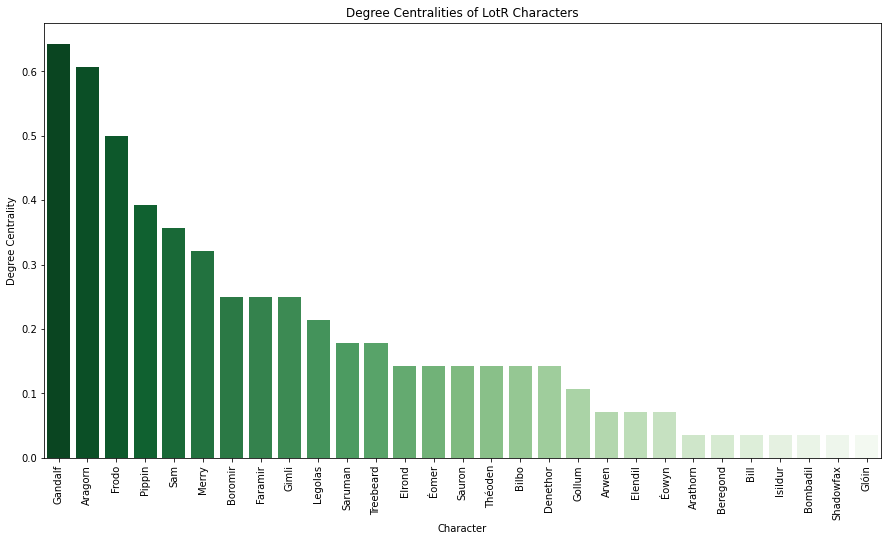

In [ ]:
cc_degree_centralities = pd.DataFrame(sorted([(node, nx.degree_centrality(conn_comp)[node]) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'Degree Centrality'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Degree Centrality', data=cc_degree_centralities, palette='Greens_r') # palette='tab20'
# plt.ylim(0, 1)
plt.xticks(rotation = 90)
plt.title('Degree Centralities of LotR Characters');

## Eigenvector centrality

Eigenvector centrality is based on the notions of "status" or "prestige" or "rank".  It's based on the idea that a node is more central if its neighbors are more central.  The definitions of this measure are inherently implicit and can be conveyed as eigenvector solutions of linear systems of equations.  

One such definition by Bonacich, in which the centrality of a node is proportional to the sum of the cetnrality of its neighbors, is:

\begin{align}
\lambda C_i^e(g) = \sum_j g_{ij} C_j^e(g)
\end{align}

where $C^e(g)$ denotes the eigenvector centrality associated with a network g and $\lambda$ is a proportionality factor.

When the network is undirected and connected, the largest eigenvalue will be simple and its eigenvector will have entries that are all nonzero and share the same sign.  Convention is to report the absolute values of these entries, which will automatically lie between 0 and 1.

In [ ]:
[(person, round(score, ndigits=4)) for person, score in sorted(nx.algorithms.centrality.eigenvector_centrality(conn_comp).items(), key=lambda item: -item[1])][:10]

[('Gandalf', 0.4003),
 ('Aragorn', 0.3686),
 ('Frodo', 0.3433),
 ('Pippin', 0.3014),
 ('Sam', 0.2718),
 ('Merry', 0.2611),
 ('Boromir', 0.2341),
 ('Faramir', 0.2341),
 ('Legolas', 0.2138),
 ('Gimli', 0.2005)]

In [ ]:
for node in conn_comp.nodes():
    conn_comp.nodes[node]['eigenvector_centrality'] = nx.eigenvector_centrality(conn_comp)[node]
    print(node, round(nx.eigenvector_centrality(conn_comp)[node], 4))

Aragorn 0.3686
Arathorn 0.042
Arwen 0.0572
Boromir 0.2341
Elendil 0.0426
Elrond 0.1334
Éomer 0.1056
Faramir 0.2341
Frodo 0.3433
Gandalf 0.4003
Gimli 0.2005
Legolas 0.2138
Merry 0.2611
Pippin 0.3014
Sam 0.2718
Saruman 0.1339
Sauron 0.1421
Théoden 0.115
Beregond 0.0344
Bilbo 0.1254
Gollum 0.0844
Bill 0.031
Denethor 0.1334
Isildur 0.0049
Éowyn 0.0418
Bombadil 0.0391
Shadowfax 0.0457
Treebeard 0.1479
Glóin 0.0229


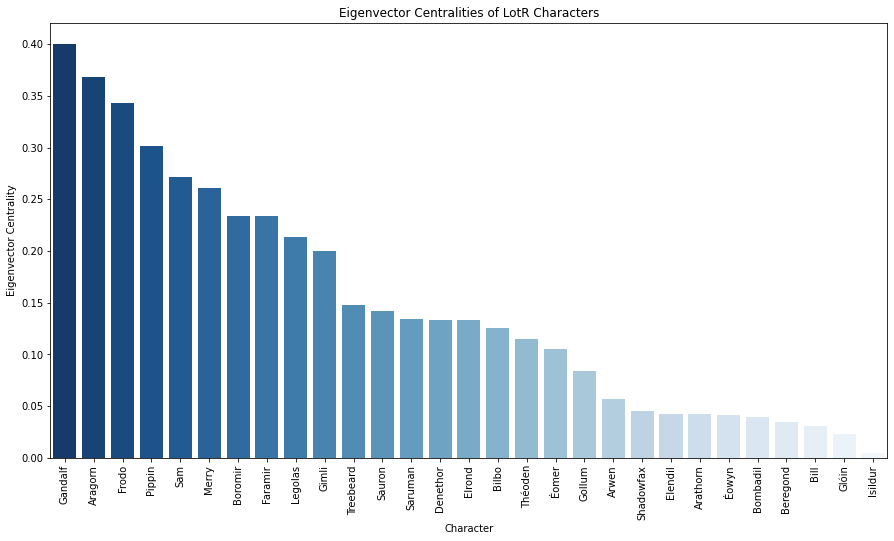

In [ ]:
cc_eigenvector_centralities = pd.DataFrame(sorted([(node, nx.eigenvector_centrality(conn_comp)[node]) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'Eigenvector Centrality'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Eigenvector Centrality', data=cc_eigenvector_centralities, palette='Blues_r') # palette='tab20'
# plt.ylim(0, 1)
plt.xticks(rotation = 90)
plt.title('Eigenvector Centralities of LotR Characters');

## PageRank

PageRank is an algorithm to compute a centrality measure that attempts to capture the "status" or "prestige" or "rank" of each node by imagining people carrying out modified random walk processes (random surfing plus jumping) for a long time and measuring the fraction of times they visit each node.  Nodes with many paths leading to them are visited more often by random surfers, and therefore have high PageRank.

PageRank can be computed with an iterative approach called the *power method* (although there are newer / alternative methods).  With the *power method*, the PageRank of node *i* at time *t* is the sum of two terms that convey the two ways one can arrive at node *i*:

\begin{align}
R_t(i) = \frac{\alpha}{N} + (1 - \alpha) \sum_{j \in pred(i)} \frac{R_{t-1}(j)}{k_{out}(j)}
\end{align}

The first term conveys teleportation to node *i*, which is one of N possible targets of a jump.  The second term conveys how someone can travel along one of the edges to node *i* during the random walk.

The definition is recursive: the PageRank of a node depends on that of its neighbors.  For $\alpha > 0$, PageRank is guaranteed to converge, even in very large networks.

In [ ]:
[(person, round(score, ndigits=4)) for person, score in sorted(nx.algorithms.pagerank(conn_comp, alpha=0.9, weight=None).items(), key=lambda item: -item[1])][:10]

[('Gandalf', 0.1072),
 ('Aragorn', 0.1061),
 ('Frodo', 0.0843),
 ('Pippin', 0.0662),
 ('Sam', 0.0614),
 ('Merry', 0.0543),
 ('Gimli', 0.0446),
 ('Boromir', 0.0418),
 ('Faramir', 0.0418),
 ('Legolas', 0.0364)]

In [ ]:
for node in conn_comp.nodes(): 
    conn_comp.nodes[node]['pagerank'] = nx.pagerank(conn_comp, alpha=0.9, weight=None)[node]
    print(node, round(nx.pagerank(conn_comp, alpha=0.9, weight=None)[node], 4))

Aragorn 0.1061
Arathorn 0.0091
Arwen 0.0151
Boromir 0.0418
Elendil 0.0205
Elrond 0.0266
Éomer 0.0271
Faramir 0.0418
Frodo 0.0843
Gandalf 0.1072
Gimli 0.0446
Legolas 0.0364
Merry 0.0543
Pippin 0.0662
Sam 0.0614
Saruman 0.0317
Sauron 0.0255
Théoden 0.0262
Beregond 0.0089
Bilbo 0.0258
Gollum 0.0202
Bill 0.009
Denethor 0.025
Isildur 0.0127
Éowyn 0.015
Bombadil 0.0089
Shadowfax 0.0088
Treebeard 0.0311
Glóin 0.0092


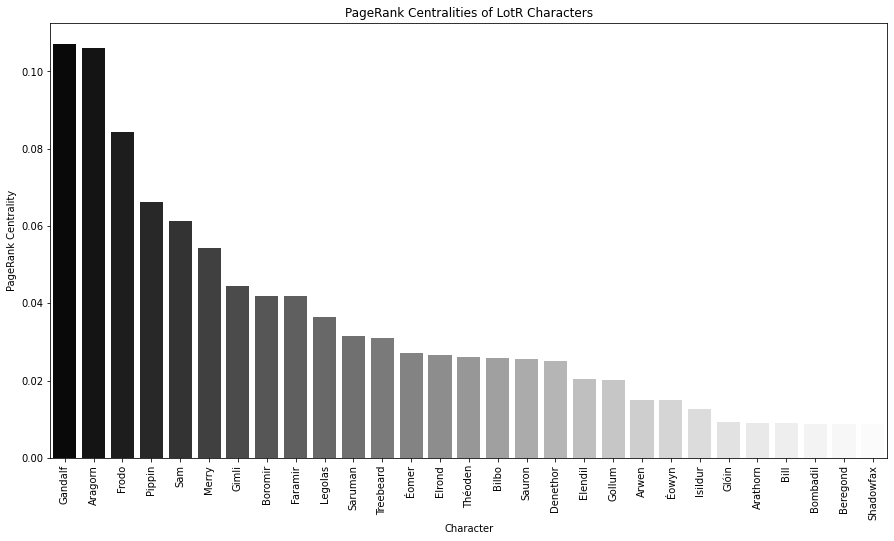

In [ ]:
cc_pagerank_centralities = pd.DataFrame(sorted([(node, nx.algorithms.pagerank(conn_comp, alpha=0.9, weight=None)[node]) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'PageRank Centrality'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='PageRank Centrality', data=cc_pagerank_centralities, palette='Greys_r') # palette='tab20'
# plt.ylim(0, 1)
plt.xticks(rotation = 90)
plt.title('PageRank Centralities of LotR Characters');

## Closeness centrality

The closeness centrality of a node is the inverse of the sum of the distances from the node to all the other nodes.

\begin{align}
closeness_i = \frac{1}{\sum_{j \ne i} l_{ij}} ; 
\end{align}

Alternatively, by multiplying this definition by N - 1, we discount the network size and make the measure comparable across networks.

\begin{align}
\bar{closeness_i} = \frac{N - 1}{\sum_{j \ne i} l_{ij}} = \frac{1}{\frac{\sum_{j \ne i} l_{ij}}{(N - 1)}}
\end{align}

Since the term in the denominator is the average distance from a node to the other nodes, this definition conveys that we can also interpret the node's closeness centrality as the inverse of its average distance.

In [ ]:
[(person, round(score, ndigits=4)) for person, score in sorted(nx.algorithms.centrality.closeness_centrality(conn_comp).items(), key=lambda item: -item[1])][:10]

[('Aragorn', 0.7179),
 ('Gandalf', 0.7179),
 ('Frodo', 0.6512),
 ('Pippin', 0.5957),
 ('Merry', 0.5833),
 ('Sam', 0.5833),
 ('Boromir', 0.5385),
 ('Faramir', 0.5385),
 ('Gimli', 0.5385),
 ('Legolas', 0.5385)]

In [ ]:
for node in conn_comp.nodes():
    conn_comp.nodes[node]['closeness_centrality'] = nx.closeness_centrality(conn_comp)[node]
    print(node, round(nx.closeness_centrality(conn_comp)[node], 4))

Aragorn 0.7179
Arathorn 0.4242
Arwen 0.4308
Boromir 0.5385
Elendil 0.4375
Elrond 0.4912
Éomer 0.4828
Faramir 0.5385
Frodo 0.6512
Gandalf 0.7179
Gimli 0.5385
Legolas 0.5385
Merry 0.5833
Pippin 0.5957
Sam 0.5833
Saruman 0.4828
Sauron 0.4912
Théoden 0.4828
Beregond 0.3784
Bilbo 0.4667
Gollum 0.4179
Bill 0.3733
Denethor 0.4516
Isildur 0.3077
Éowyn 0.3889
Bombadil 0.4
Shadowfax 0.4242
Treebeard 0.4746
Glóin 0.3544


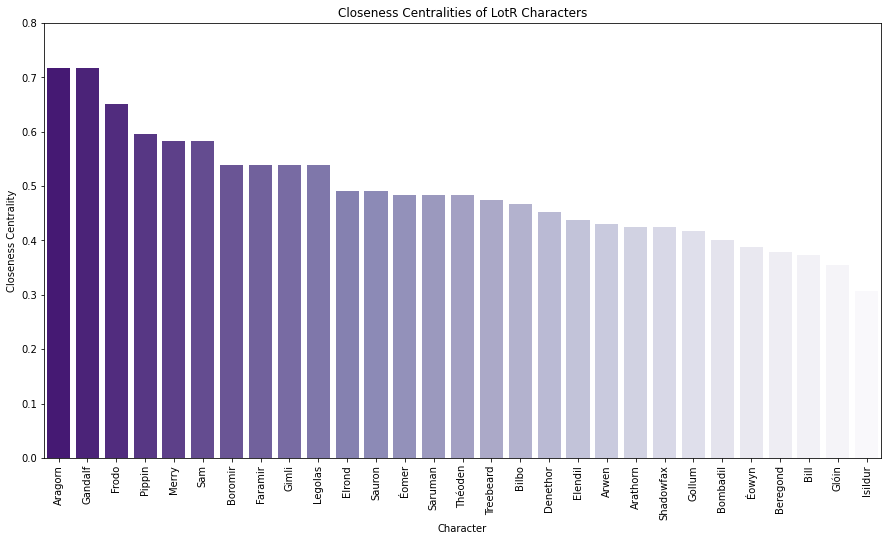

In [ ]:
cc_closeness_centralities = pd.DataFrame(sorted([(node, nx.closeness_centrality(conn_comp)[node]) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'Closeness Centrality'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Closeness Centrality', data=cc_closeness_centralities, palette='Purples_r') # palette='tab20'
plt.ylim(0, 0.8)
plt.xticks(rotation = 90)
plt.title('Closeness Centralities of LotR Characters');

## Betweenness centrality

Imagine diffusion processes happening in networks, e.g. information being shared in social networks, products being transported through manufacturing networks, data being transported through communication networks.  Suppose these diffusion processes travel from node to node along shortest paths.  In this situation, a node is more central (has higher betweenness centrality) when more and more of these diffusion processes (shortest paths) pass through the node.

Specifically, a node's betweenness centrality is:

\begin{align}
betweenness_i = \sum_{h \ne j \ne i} \frac{\sigma_{hj}(i)}{\sigma_{hj}}
\end{align}

where the sum is over all pairs of nodes h and j, not equal to i or each other.  If no shortest path between h and j goes through i, the contribution of (h, j) to the betweenness of i is 0.  If all shortest paths between h and j go through i, the contribution is 1.

Since the potential contributions come from all pairs of nodes, the betweenness grows with the network size.  To normalize $betweenness_i$ and make the measure comparable across networks, we divide it by ${N - 1 \choose 2}$. 

In [ ]:
[(person, round(score, ndigits=4)) for person, score in sorted(nx.algorithms.centrality.betweenness_centrality(conn_comp).items(), key=lambda item: -item[1])][:10]

[('Aragorn', 0.3449),
 ('Gandalf', 0.2414),
 ('Frodo', 0.1553),
 ('Sam', 0.1034),
 ('Pippin', 0.0965),
 ('Gimli', 0.0763),
 ('Elendil', 0.0714),
 ('Merry', 0.0628),
 ('Éomer', 0.0184),
 ('Elrond', 0.0082)]

In [ ]:
for node in conn_comp.nodes():
    conn_comp.nodes[node]['betweenness_centrality'] = nx.betweenness_centrality(conn_comp)[node]
    print(node, round(nx.betweenness_centrality(conn_comp)[node], 4))

Aragorn 0.3449
Arathorn 0.0
Arwen 0.0
Boromir 0.0064
Elendil 0.0714
Elrond 0.0082
Éomer 0.0184
Faramir 0.0064
Frodo 0.1553
Gandalf 0.2414
Gimli 0.0763
Legolas 0.0018
Merry 0.0628
Pippin 0.0965
Sam 0.1034
Saruman 0.0061
Sauron 0.0022
Théoden 0.0013
Beregond 0.0
Bilbo 0.0039
Gollum 0.0
Bill 0.0
Denethor 0.0
Isildur 0.0
Éowyn 0.0009
Bombadil 0.0
Shadowfax 0.0
Treebeard 0.0066
Glóin 0.0


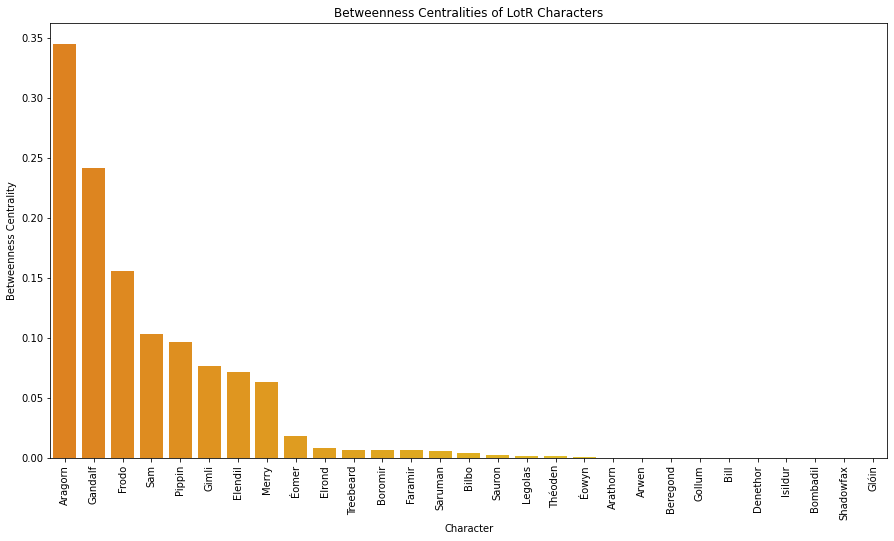

In [ ]:
cc_betweenness_centralities = pd.DataFrame(sorted([(node, nx.betweenness_centrality(conn_comp)[node]) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'Betweenness Centrality'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Betweenness Centrality', data=cc_betweenness_centralities, palette='Wistia_r') # palette='tab20'
# plt.ylim(0, 1)
plt.xticks(rotation = 90)
plt.title('Betweenness Centralities of LotR Characters');

## Clustering coefficient (Transitivity)

The clustering coefficient (transitivity) of a node is the fraction of pairs of the node's neighbors that are connected to each other.  In a social network we can rephrase this definition as -- the clustering coefficient for a person is the fraction of pairs of the person's connections that are connected to each other.  The connectivity among neighbors of nodes is an important feature of local structure because it indicates the extent to which the nodes are tightly knit, or clustered.

\begin{align}
clustering_i = \frac{\tau(i)}{\tau_{max}(i)} = \frac{2\tau(i)}{k_i(k_i - 1)}
\end{align}

where $\tau(i)$ is the number of triangles involving i.  Nodes with degree k < 2 are excluded when calculating the average clustering coefficient.

By averaging the clustering coefficient across the nodes, we can calculate a clustering coefficient for the entire network.  A low clustering coefficient (near zero) indicates the network has few triangles, whereas a high clustering coefficient indicates it has many triangles.  Social networks tend to have high clustering coefficients.

In [ ]:
[(person, round(score, ndigits=4)) for person, score in sorted(nx.clustering(conn_comp).items(), key=lambda item: -item[1])][:10]

[('Arwen', 1.0),
 ('Gollum', 1.0),
 ('Denethor', 1.0),
 ('Legolas', 0.9333),
 ('Boromir', 0.8571),
 ('Faramir', 0.8571),
 ('Sauron', 0.8333),
 ('Théoden', 0.8333),
 ('Bilbo', 0.8333),
 ('Elrond', 0.6667)]

In [ ]:
for node in conn_comp.nodes():
    conn_comp.nodes[node]['clustering_coefficient'] = nx.clustering(conn_comp)[node]
    print(node, round(nx.clustering(conn_comp)[node], 4))

Aragorn 0.2794
Arathorn 0
Arwen 1.0
Boromir 0.8571
Elendil 0
Elrond 0.6667
Éomer 0.5
Faramir 0.8571
Frodo 0.3846
Gandalf 0.3007
Gimli 0.5714
Legolas 0.9333
Merry 0.5833
Pippin 0.5091
Sam 0.5111
Saruman 0.6
Sauron 0.8333
Théoden 0.8333
Beregond 0
Bilbo 0.8333
Gollum 1.0
Bill 0
Denethor 1.0
Isildur 0
Éowyn 0
Bombadil 0
Shadowfax 0
Treebeard 0.6
Glóin 0


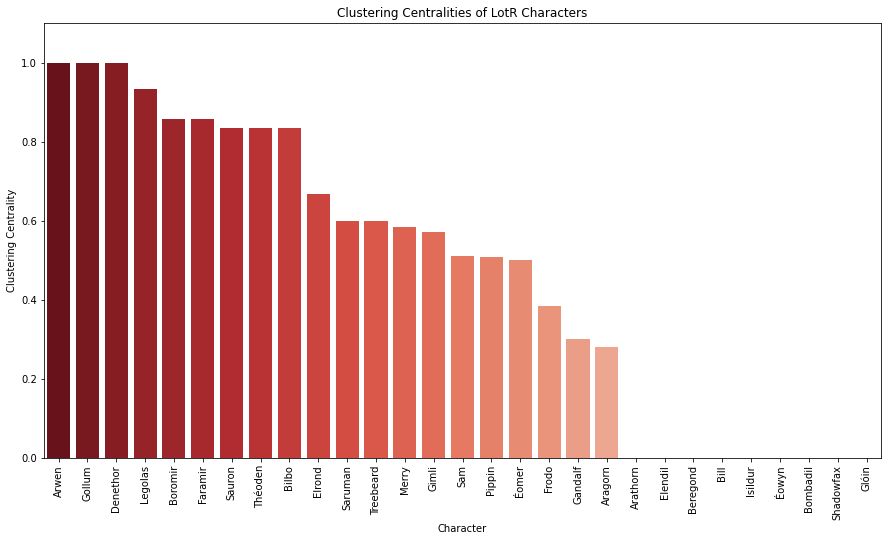

In [ ]:
cc_clustering_centralities = pd.DataFrame(sorted([(node, nx.clustering(conn_comp)[node]) for node in conn_comp.nodes], key=lambda item: -item[1]), columns=['Character', 'Clustering Centrality'])

plt.figure(figsize = (15,8))
sns.barplot(x='Character', y='Clustering Centrality', data=cc_clustering_centralities, palette='Reds_r') # palette='tab20'
plt.ylim(0, 1.1)
plt.xticks(rotation = 90)
plt.title('Clustering Centralities of LotR Characters');

# Plot the nodes and weighted edges of the largest connected LotR network
# (including the names of the characters)

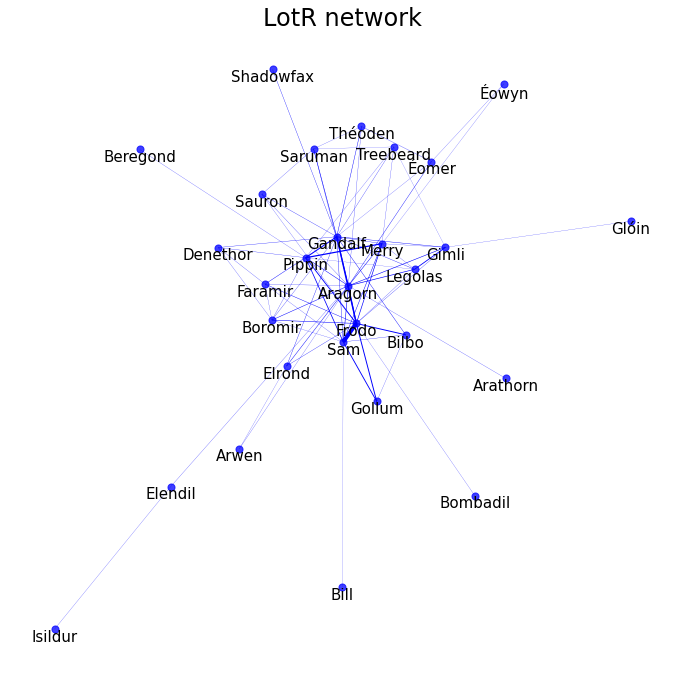

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.layout.spring_layout(conn_comp, k=0.1, weight='weight', seed=24)

nodes = nx.draw_networkx_nodes(conn_comp, pos, node_size=50, node_color='Blue', alpha=0.75)

unique_weights = network_df['weight'].unique()
for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in conn_comp.edges(data=True) if edge_attr['weight']==weight]
    width = weight*4.0/max(unique_weights)
    nx.draw_networkx_edges(conn_comp, pos, edgelist=weighted_edges, width=width, alpha=1, edge_color='Blue')

labels = nx.draw_networkx_labels(conn_comp, pos, font_size=15, font_family='sans-serif', verticalalignment='top')

ax = plt.gca()
ax.set_axis_off()

plt.title('LotR network', size=24)
plt.show()

# Plot the nodes and edges of the LotR network (color nodes by gender)

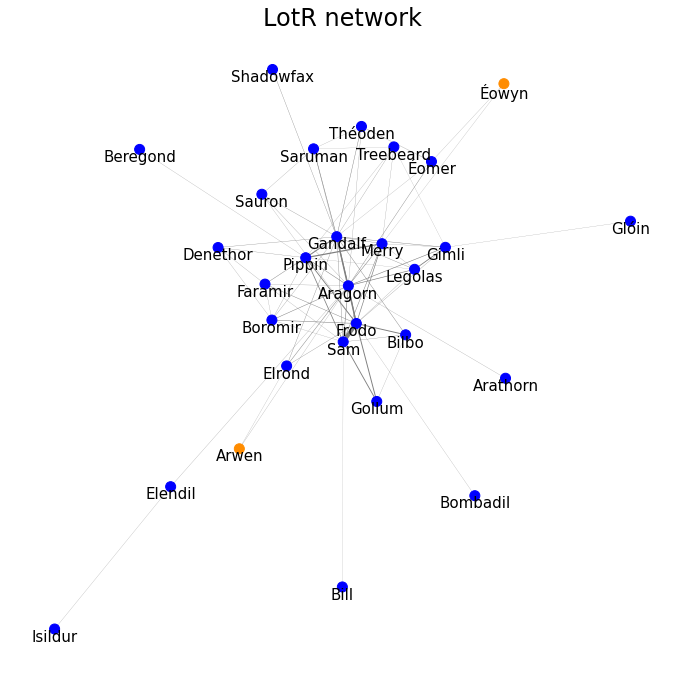

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.layout.spring_layout(conn_comp, k=0.1, weight='weight', seed=24)

node_colors = [nodedata['gender_color'] for _, nodedata in conn_comp.nodes(data=True)]
nodes = nx.draw_networkx_nodes(conn_comp, pos, node_size=100, node_color=node_colors)

unique_weights = network_df['weight'].unique()
for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in conn_comp.edges(data=True) if edge_attr['weight']==weight]
    width = weight*4.0/max(unique_weights)
    nx.draw_networkx_edges(conn_comp, pos, edgelist=weighted_edges, width=width, alpha=1, edge_color='grey')

labels = nx.draw_networkx_labels(conn_comp, pos, font_size=15, font_family='sans-serif', verticalalignment='top')

ax = plt.gca()
ax.set_axis_off()

plt.title('LotR network', size=24)
plt.show()

# Plot the nodes and edges of the LotR network (color nodes by subtype)

In [ ]:
subtype_colormap

{'ainur': 'tab:blue',
 'animal': 'tab:orange',
 'dwarf': 'tab:green',
 'elves': 'tab:red',
 'ents': 'tab:purple',
 'hobbit': 'tab:brown',
 'men': 'tab:pink',
 'orcs': 'tab:cyan'}

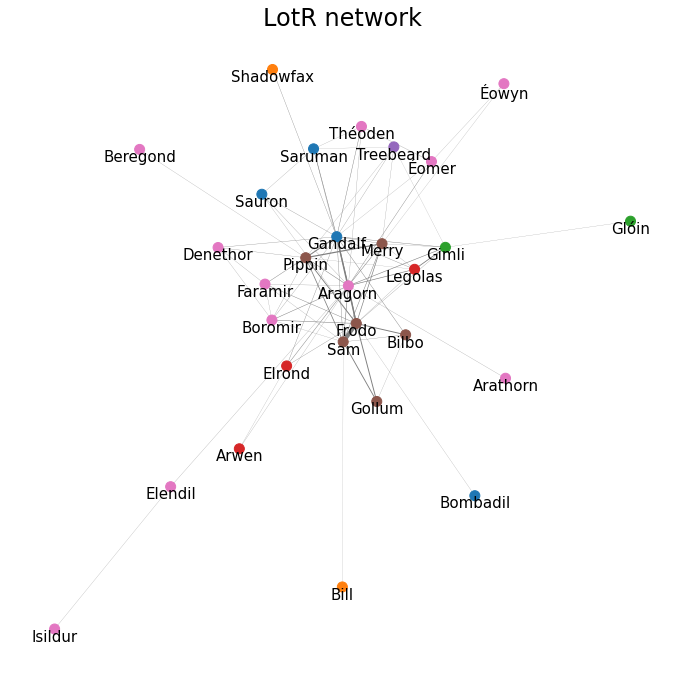

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.layout.spring_layout(conn_comp, k=0.1, weight='weight', seed=24)

node_colors = [nodedata['subtype_color'] for _, nodedata in conn_comp.nodes(data=True)]
nodes = nx.draw_networkx_nodes(conn_comp, pos, node_size=100, node_color=node_colors)

unique_weights = network_df['weight'].unique()
for weight in unique_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in conn_comp.edges(data=True) if edge_attr['weight']==weight]
    width = weight*4.0/max(unique_weights)
    nx.draw_networkx_edges(conn_comp, pos, edgelist=weighted_edges, width=width, alpha=1, edge_color='grey')

labels = nx.draw_networkx_labels(conn_comp, pos, font_size=15, font_family='sans-serif', verticalalignment='top')

ax = plt.gca()
ax.set_axis_off()

plt.title('LotR network', size=24)
plt.show()

# Create a network graph for LotR Book 1

In [ ]:
book1_df = sqldf("""
    SELECT 
      sour.id AS source_id, sour.label as source_name, sour.type AS source_type, sour.subtype AS source_subtype, sour.gender AS source_gender,
      dest.id AS target_id, dest.label AS target_name, dest.type AS target_type, dest.subtype AS target_subtype, dest.gender AS target_gender,
      conn.weight, conn.volume, conn.title, conn.publication_date
    FROM 
      book1 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

    UNION 

    SELECT 
      dest.id AS source_id, dest.label as source_name, dest.type AS source_type, dest.subtype AS source_subtype, dest.gender AS source_gender,
      sour.id AS target_id, sour.label AS target_name, sour.type AS target_type, sour.subtype AS target_subtype, sour.gender AS target_gender,
      conn.weight, conn.volume, conn.title, conn.publication_date
    FROM 
      book1 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

  """)

book1_df.weight = book1_df.weight.astype('int')
book1_df.publication_date = pd.to_datetime(book1_df.publication_date).dt.date.apply(lambda dt: str(dt))

book1_df.sort_values('weight', ascending=False).head(10)

,source_id,source_name,source_type,source_subtype,source_gender,target_id,target_name,target_type,target_subtype,target_gender,weight,volume,title,publication_date
516,frod,Frodo,per,hobbit,male,sams,Sam,per,hobbit,male,171,Book 1,The Fellowship of the Ring,1954-07-29
1298,sams,Sam,per,hobbit,male,frod,Frodo,per,hobbit,male,171,Book 1,The Fellowship of the Ring,1954-07-29
488,frod,Frodo,per,hobbit,male,ganda,Gandalf,per,ainur,male,129,Book 1,The Fellowship of the Ring,1954-07-29
559,ganda,Gandalf,per,ainur,male,frod,Frodo,per,hobbit,male,129,Book 1,The Fellowship of the Ring,1954-07-29
470,frod,Frodo,per,hobbit,male,arag,Aragorn,per,men,male,105,Book 1,The Fellowship of the Ring,1954-07-29
44,arag,Aragorn,per,men,male,frod,Frodo,per,hobbit,male,105,Book 1,The Fellowship of the Ring,1954-07-29
475,frod,Frodo,per,hobbit,male,bilb,Bilbo,per,hobbit,male,96,Book 1,The Fellowship of the Ring,1954-07-29
143,bilb,Bilbo,per,hobbit,male,frod,Frodo,per,hobbit,male,96,Book 1,The Fellowship of the Ring,1954-07-29
1154,pipp,Pippin,per,hobbit,male,frod,Frodo,per,hobbit,male,80,Book 1,The Fellowship of the Ring,1954-07-29
512,frod,Frodo,per,hobbit,male,pipp,Pippin,per,hobbit,male,80,Book 1,The Fellowship of the Ring,1954-07-29


In [ ]:
G_book1 = nx.from_pandas_edgelist(
        book1_df[(book1_df['source_type'] == 'per') & (book1_df['target_type'] == 'per') & (book1_df['weight'] > 20)],
        source="source_name",
        target="target_name",
        edge_attr=["weight"],
        create_using=nx.Graph(),
    )

G_book1

## Set node attributes

In [ ]:
attrs_book1 = {}
for row in book1_df.itertuples(index=False):
    if row.source_name not in attrs_book1:
        attrs_book1[row.source_name] = {'subtype': row.source_subtype, 
                                        'gender': row.source_gender, 
                                        'title': row.title, 
                                        'publication_date': row.publication_date}

len(attrs_book1)

62

In [ ]:
nx.set_node_attributes(G_book1, attrs_book1)

In [ ]:
[(n, G_book1.nodes[n]) for n in G_book1.nodes()]

[('Aragorn',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'men',
   'title': 'The Fellowship of the Ring'}),
 ('Boromir',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'men',
   'title': 'The Fellowship of the Ring'}),
 ('Elrond',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'elves',
   'title': 'The Fellowship of the Ring'}),
 ('Frodo',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'hobbit',
   'title': 'The Fellowship of the Ring'}),
 ('Gandalf',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'ainur',
   'title': 'The Fellowship of the Ring'}),
 ('Merry',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'hobbit',
   'title': 'The Fellowship of the Ring'}),
 ('Pippin',
  {'gender': 'male',
   'publication_date': '1954-07-29',
   'subtype': 'hobbit',
   'title': 'The Fellowship of the Ring'}),
 ('Sam',
  {'gender': 'male',
   'publica

## Identify the largest connected component

In [ ]:
[len(component) for component in sorted(nx.connected_components(G_book1))]

[12]

In [ ]:
G_book1_cc = max(nx.connected_components(G_book1), key=len)
len(G_book1_cc)

12

In [ ]:
G_book1_conn_comp = G_book1.subgraph(G_book1_cc).copy()

## Add centrality measures to nodes in the largest connected component

In [ ]:
for node in G_book1_conn_comp.nodes():
    G_book1_conn_comp.nodes[node]['degree_centrality'] = nx.degree_centrality(G_book1_conn_comp)[node]
    G_book1_conn_comp.nodes[node]['clustering_centrality'] = nx.clustering(G_book1_conn_comp)[node]
    G_book1_conn_comp.nodes[node]['closeness_centrality'] = nx.closeness_centrality(G_book1_conn_comp)[node]
    G_book1_conn_comp.nodes[node]['betweenness_centrality'] = nx.betweenness_centrality(G_book1_conn_comp)[node]
    G_book1_conn_comp.nodes[node]['eigenvector_centrality'] = nx.eigenvector_centrality(G_book1_conn_comp)[node]
    G_book1_conn_comp.nodes[node]['pagerank_centrality'] = nx.pagerank(G_book1_conn_comp, alpha=0.9, weight=None)[node]

print('Finished assigning node centralities.')

Finished assigning node centralities.


## Convert G_book1 into JSON

In [ ]:
G_book1_json = json_graph.node_link_data(G_book1_conn_comp)
G_book1_json

{'directed': False,
 'graph': {},
 'links': [{'source': 'Aragorn', 'target': 'Boromir', 'weight': 40},
  {'source': 'Aragorn', 'target': 'Elrond', 'weight': 22},
  {'source': 'Aragorn', 'target': 'Frodo', 'weight': 105},
  {'source': 'Aragorn', 'target': 'Gandalf', 'weight': 41},
  {'source': 'Aragorn', 'target': 'Merry', 'weight': 30},
  {'source': 'Aragorn', 'target': 'Pippin', 'weight': 22},
  {'source': 'Aragorn', 'target': 'Sam', 'weight': 50},
  {'source': 'Boromir', 'target': 'Frodo', 'weight': 42},
  {'source': 'Elrond', 'target': 'Frodo', 'weight': 27},
  {'source': 'Elrond', 'target': 'Gandalf', 'weight': 27},
  {'source': 'Frodo', 'target': 'Bilbo', 'weight': 96},
  {'source': 'Frodo', 'target': 'Gandalf', 'weight': 129},
  {'source': 'Frodo', 'target': 'Legolas', 'weight': 21},
  {'source': 'Frodo', 'target': 'Merry', 'weight': 64},
  {'source': 'Frodo', 'target': 'Pippin', 'weight': 80},
  {'source': 'Frodo', 'target': 'Sam', 'weight': 171},
  {'source': 'Frodo', 'target':

## Write G_book1 to JSON and download

In [ ]:
from google.colab import files

with open('LotR_Book1_from_Python.json', 'w') as book1_outfile:
    json.dump(G_book1_json, book1_outfile)

files.download('LotR_Book1_from_Python.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Create a network graph for LotR Book 2

In [ ]:
book2_df = sqldf("""
    SELECT 
      sour.id AS source_id, sour.label as source_name, sour.type AS source_type, sour.subtype AS source_subtype, sour.gender AS source_gender,
      dest.id AS target_id, dest.label AS target_name, dest.type AS target_type, dest.subtype AS target_subtype, dest.gender AS target_gender,
      conn.weight, conn.volume, conn.title, conn.publication_date
    FROM 
      book2 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

    UNION 

    SELECT 
      dest.id AS source_id, dest.label as source_name, dest.type AS source_type, dest.subtype AS source_subtype, dest.gender AS source_gender,
      sour.id AS target_id, sour.label AS target_name, sour.type AS target_type, sour.subtype AS target_subtype, sour.gender AS target_gender,
      conn.weight, conn.volume, conn.title, conn.publication_date
    FROM 
      book2 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

  """)

book2_df.weight = book2_df.weight.astype('int')
book2_df.publication_date = pd.to_datetime(book2_df.publication_date).dt.date.apply(lambda dt: str(dt))

book2_df.sort_values('weight', ascending=False).head(10)

,source_id,source_name,source_type,source_subtype,source_gender,target_id,target_name,target_type,target_subtype,target_gender,weight,volume,title,publication_date
1272,sams,Sam,per,hobbit,male,frod,Frodo,per,hobbit,male,158,Book 2,The Two Towers,1954-11-11
480,frod,Frodo,per,hobbit,male,sams,Sam,per,hobbit,male,158,Book 2,The Two Towers,1954-11-11
1277,sams,Sam,per,hobbit,male,goll,Gollum,per,hobbit,male,101,Book 2,The Two Towers,1954-11-11
640,goll,Gollum,per,hobbit,male,sams,Sam,per,hobbit,male,101,Book 2,The Two Towers,1954-11-11
626,goll,Gollum,per,hobbit,male,frod,Frodo,per,hobbit,male,99,Book 2,The Two Towers,1954-11-11
457,frod,Frodo,per,hobbit,male,goll,Gollum,per,hobbit,male,99,Book 2,The Two Towers,1954-11-11
896,merr,Merry,per,hobbit,male,pipp,Pippin,per,hobbit,male,51,Book 2,The Two Towers,1954-11-11
1139,pipp,Pippin,per,hobbit,male,merr,Merry,per,hobbit,male,51,Book 2,The Two Towers,1954-11-11
588,gimli,Gimli,per,dwarf,male,lego,Legolas,per,elves,male,50,Book 2,The Two Towers,1954-11-11
818,lego,Legolas,per,elves,male,gimli,Gimli,per,dwarf,male,50,Book 2,The Two Towers,1954-11-11


In [ ]:
G_book2 = nx.from_pandas_edgelist(
        book2_df[(book2_df['source_type'] == 'per') & (book2_df['target_type'] == 'per') & (book2_df['weight'] > 20)],
        source="source_name",
        target="target_name",
        edge_attr=["weight"],
        create_using=nx.Graph(),
    )

G_book2

## Set node attributes

In [ ]:
attrs_book2 = {}
for row in book2_df.itertuples(index=False):
    if row.source_name not in attrs_book2:
        attrs_book2[row.source_name] = {'subtype': row.source_subtype, 
                                        'gender': row.source_gender, 
                                        'title': row.title, 
                                        'publication_date': row.publication_date}

len(attrs_book2)

65

In [ ]:
nx.set_node_attributes(G_book2, attrs_book2)

In [ ]:
[(n, G_book2.nodes[n]) for n in G_book2.nodes()]

[('Aragorn',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'men',
   'title': 'The Two Towers'}),
 ('Éomer',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'men',
   'title': 'The Two Towers'}),
 ('Gandalf',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'ainur',
   'title': 'The Two Towers'}),
 ('Gimli',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'dwarf',
   'title': 'The Two Towers'}),
 ('Legolas',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'elves',
   'title': 'The Two Towers'}),
 ('Boromir',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'men',
   'title': 'The Two Towers'}),
 ('Frodo',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'hobbit',
   'title': 'The Two Towers'}),
 ('Faramir',
  {'gender': 'male',
   'publication_date': '1954-11-11',
   'subtype': 'men',
   'title': 'The Two Towers'}),
 ('Sa

## Identify the largest connected component

In [ ]:
[len(component) for component in sorted(nx.connected_components(G_book2))]

[11, 5]

In [ ]:
G_book2_cc = max(nx.connected_components(G_book2), key=len)
len(G_book2_cc)

11

In [ ]:
G_book2_conn_comp = G_book2.subgraph(G_book2_cc).copy()

## Add centrality measures to nodes in the largest connected component

In [ ]:
for node in G_book2_conn_comp.nodes():
    G_book2_conn_comp.nodes[node]['degree_centrality'] = nx.degree_centrality(G_book2_conn_comp)[node]
    G_book2_conn_comp.nodes[node]['clustering_centrality'] = nx.clustering(G_book2_conn_comp)[node]
    G_book2_conn_comp.nodes[node]['closeness_centrality'] = nx.closeness_centrality(G_book2_conn_comp)[node]
    G_book2_conn_comp.nodes[node]['betweenness_centrality'] = nx.betweenness_centrality(G_book2_conn_comp)[node]
    G_book2_conn_comp.nodes[node]['eigenvector_centrality'] = nx.eigenvector_centrality(G_book2_conn_comp)[node]
    G_book2_conn_comp.nodes[node]['pagerank_centrality'] = nx.pagerank(G_book2_conn_comp, alpha=0.9, weight=None)[node]

print('Finished assigning node centralities.')

Finished assigning node centralities.


## Convert G_book2 into JSON

In [ ]:
G_book2_json = json_graph.node_link_data(G_book2_conn_comp)
G_book2_json

{'directed': False,
 'graph': {},
 'links': [{'source': 'Aragorn', 'target': 'Éomer', 'weight': 21},
  {'source': 'Aragorn', 'target': 'Gandalf', 'weight': 38},
  {'source': 'Aragorn', 'target': 'Gimli', 'weight': 28},
  {'source': 'Aragorn', 'target': 'Legolas', 'weight': 34},
  {'source': 'Gandalf', 'target': 'Gimli', 'weight': 22},
  {'source': 'Gandalf', 'target': 'Legolas', 'weight': 23},
  {'source': 'Gandalf', 'target': 'Pippin', 'weight': 23},
  {'source': 'Gandalf', 'target': 'Saruman', 'weight': 49},
  {'source': 'Gandalf', 'target': 'Shadowfax', 'weight': 21},
  {'source': 'Gandalf', 'target': 'Théoden', 'weight': 46},
  {'source': 'Gandalf', 'target': 'Treebeard', 'weight': 26},
  {'source': 'Gimli', 'target': 'Legolas', 'weight': 50},
  {'source': 'Pippin', 'target': 'Merry', 'weight': 51},
  {'source': 'Pippin', 'target': 'Treebeard', 'weight': 23},
  {'source': 'Treebeard', 'target': 'Merry', 'weight': 25}],
 'multigraph': False,
 'nodes': [{'betweenness_centrality': 0.2

## Write G_book2 to JSON and download

In [ ]:
from google.colab import files

with open('LotR_Book2_from_Python.json', 'w') as book2_outfile:
    json.dump(G_book2_json, book2_outfile)

files.download('LotR_Book2_from_Python.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Create a network graph for LotR Book 3

In [ ]:
book3_df = sqldf("""
    SELECT 
      sour.id AS source_id, sour.label as source_name, sour.type AS source_type, sour.subtype AS source_subtype, sour.gender AS source_gender,
      dest.id AS target_id, dest.label AS target_name, dest.type AS target_type, dest.subtype AS target_subtype, dest.gender AS target_gender,
      conn.weight, conn.volume, conn.title, conn.publication_date
    FROM 
      book3 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

    UNION 

    SELECT 
      dest.id AS source_id, dest.label as source_name, dest.type AS source_type, dest.subtype AS source_subtype, dest.gender AS source_gender,
      sour.id AS target_id, sour.label AS target_name, sour.type AS target_type, sour.subtype AS target_subtype, sour.gender AS target_gender,
      conn.weight, conn.volume, conn.title, conn.publication_date
    FROM 
      book3 conn 
      JOIN ontology sour
      ON
        conn.source = sour.id
      JOIN ontology dest
      ON  
        conn.target = dest.id

  """)

book3_df.weight = book3_df.weight.astype('int')
book3_df.publication_date = pd.to_datetime(book3_df.publication_date).dt.date.apply(lambda dt: str(dt))

book3_df.sort_values('weight', ascending=False).head(10)

,source_id,source_name,source_type,source_subtype,source_gender,target_id,target_name,target_type,target_subtype,target_gender,weight,volume,title,publication_date
1127,sams,Sam,per,hobbit,male,frod,Frodo,per,hobbit,male,193,Book 3,The Return of the King,1955-10-20
494,frod,Frodo,per,hobbit,male,sams,Sam,per,hobbit,male,193,Book 3,The Return of the King,1955-10-20
999,pipp,Pippin,per,hobbit,male,ganda,Gandalf,per,ainur,male,79,Book 3,The Return of the King,1955-10-20
567,ganda,Gandalf,per,ainur,male,pipp,Pippin,per,hobbit,male,79,Book 3,The Return of the King,1955-10-20
1009,pipp,Pippin,per,hobbit,male,merr,Merry,per,hobbit,male,45,Book 3,The Return of the King,1955-10-20
843,merr,Merry,per,hobbit,male,pipp,Pippin,per,hobbit,male,45,Book 3,The Return of the King,1955-10-20
231,dene,Denethor,per,men,male,pipp,Pippin,per,hobbit,male,34,Book 3,The Return of the King,1955-10-20
530,ganda,Gandalf,per,ainur,male,arag,Aragorn,per,men,male,34,Book 3,The Return of the King,1955-10-20
992,pipp,Pippin,per,hobbit,male,dene,Denethor,per,men,male,34,Book 3,The Return of the King,1955-10-20
222,dene,Denethor,per,men,male,ganda,Gandalf,per,ainur,male,34,Book 3,The Return of the King,1955-10-20


In [ ]:
G_book3 = nx.from_pandas_edgelist(
        book3_df[(book3_df['source_type'] == 'per') & (book3_df['target_type'] == 'per') & (book3_df['weight'] > 20)],
        source="source_name",
        target="target_name",
        edge_attr=["weight"],
        create_using=nx.Graph(),
    )

G_book3

## Set node attributes

In [ ]:
attrs_book3 = {}
for row in book3_df.itertuples(index=False):
    if row.source_name not in attrs_book3:
        attrs_book3[row.source_name] = {'subtype': row.source_subtype, 
                                        'gender': row.source_gender, 
                                        'title': row.title, 
                                        'publication_date': row.publication_date}

len(attrs_book3)

68

In [ ]:
nx.set_node_attributes(G_book3, attrs_book3)

In [ ]:
[(n, G_book3.nodes[n]) for n in G_book3.nodes()]

[('Aragorn',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'men',
   'title': 'The Return of the King'}),
 ('Éomer',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'men',
   'title': 'The Return of the King'}),
 ('Gandalf',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'ainur',
   'title': 'The Return of the King'}),
 ('Gimli',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'dwarf',
   'title': 'The Return of the King'}),
 ('Legolas',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'elves',
   'title': 'The Return of the King'}),
 ('Merry',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'hobbit',
   'title': 'The Return of the King'}),
 ('Beregond',
  {'gender': 'male',
   'publication_date': '1955-10-20',
   'subtype': 'men',
   'title': 'The Return of the King'}),
 ('Pippin',
  {'gender': 'male',
   'publication_date': '1955-10-20',
  

## Identify the largest connected component

In [ ]:
[len(component) for component in sorted(nx.connected_components(G_book3))]

[13]

In [ ]:
G_book3_cc = max(nx.connected_components(G_book3), key=len)
len(G_book3_cc)

13

In [ ]:
G_book3_conn_comp = G_book3.subgraph(G_book3_cc).copy()

## Add centrality measures to nodes in the largest connected component

In [ ]:
for node in G_book3_conn_comp.nodes():
    G_book3_conn_comp.nodes[node]['degree_centrality'] = nx.degree_centrality(G_book3_conn_comp)[node]
    G_book3_conn_comp.nodes[node]['clustering_centrality'] = nx.clustering(G_book3_conn_comp)[node]
    G_book3_conn_comp.nodes[node]['closeness_centrality'] = nx.closeness_centrality(G_book3_conn_comp)[node]
    G_book3_conn_comp.nodes[node]['betweenness_centrality'] = nx.betweenness_centrality(G_book3_conn_comp)[node]
    G_book3_conn_comp.nodes[node]['eigenvector_centrality'] = nx.eigenvector_centrality(G_book3_conn_comp)[node]
    G_book3_conn_comp.nodes[node]['pagerank_centrality'] = nx.pagerank(G_book3_conn_comp, alpha=0.9, weight=None)[node]

print('Finished assigning node centralities.')

Finished assigning node centralities.


## Convert G_book3 into JSON

In [ ]:
G_book3_json = json_graph.node_link_data(G_book3_conn_comp)
G_book3_json

{'directed': False,
 'graph': {},
 'links': [{'source': 'Aragorn', 'target': 'Éomer', 'weight': 24},
  {'source': 'Aragorn', 'target': 'Gandalf', 'weight': 34},
  {'source': 'Aragorn', 'target': 'Gimli', 'weight': 28},
  {'source': 'Aragorn', 'target': 'Legolas', 'weight': 26},
  {'source': 'Aragorn', 'target': 'Merry', 'weight': 21},
  {'source': 'Gandalf', 'target': 'Denethor', 'weight': 34},
  {'source': 'Gandalf', 'target': 'Faramir', 'weight': 24},
  {'source': 'Gandalf', 'target': 'Frodo', 'weight': 24},
  {'source': 'Gandalf', 'target': 'Pippin', 'weight': 79},
  {'source': 'Gimli', 'target': 'Legolas', 'weight': 32},
  {'source': 'Merry', 'target': 'Éowyn', 'weight': 21},
  {'source': 'Merry', 'target': 'Pippin', 'weight': 45},
  {'source': 'Beregond', 'target': 'Pippin', 'weight': 27},
  {'source': 'Pippin', 'target': 'Denethor', 'weight': 34},
  {'source': 'Pippin', 'target': 'Faramir', 'weight': 24},
  {'source': 'Pippin', 'target': 'Frodo', 'weight': 27},
  {'source': 'Pipp

## Write G_book3 to JSON and download

In [ ]:
from google.colab import files

with open('LotR_Book3_from_Python.json', 'w') as book3_outfile:
    json.dump(G_book3_json, book3_outfile)

files.download('LotR_Book3_from_Python.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# References

1. Filippo Menczer, Santo Fortunato, and Clayton Davis. [A First Course in Network Science](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/). Cambridge University Press, 2020.

2. Eric Kolaczyk and Gabor Csardi. [Statistical Analysis of Network Data with R, 2nd Edition](https://github.com/kolaczyk/sand). Springer, 2020.

3. Mark Newman. [Networks, 2nd Edition](https://www.amazon.com/Networks-Mark-Newman-dp-0198805098/dp/0198805098/). Oxford University Press, 2018.

4. Matthew Jackson. [Social and Economic Networks](https://www.coursera.org/learn/social-economic-networks). Princeton University Press, 2008.

5. Matthew Jackson. [The Human Network: How Your Social Position Determines Your Power, Beliefs, and Behaviors](https://web.stanford.edu/~jacksonm/books.html). Vintage Books, 2020.

6. David Easley and Jon Kleinberg. [Networks, Crowds, and Markets: Reasoning about a Highly Connected World](https://www.cs.cornell.edu/home/kleinber/networks-book/). Cambridge University Press, 2010.